# Taxi demand prediction in New York City


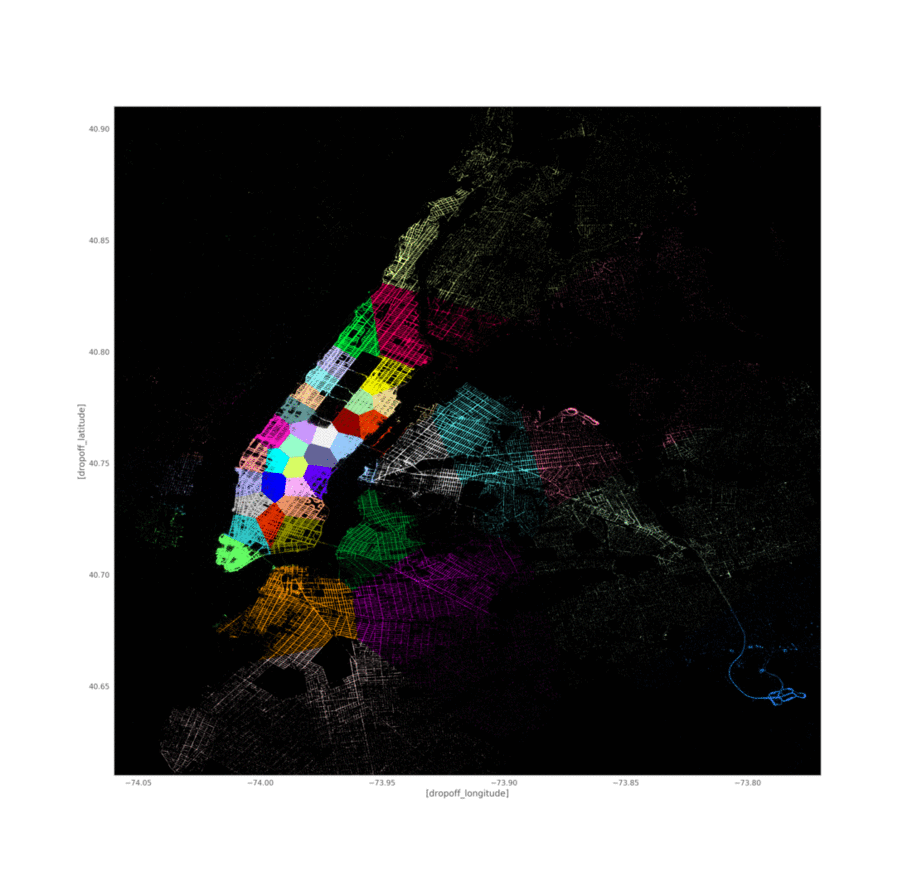

In [1]:
#Importing Libraries
!pip3 install graphviz
!pip3 install dask
!pip install "dask[complete]" 
!pip3 install toolz
!pip3 install cloudpickle
!pip3 install folium
!pip3 install gpxpy
!pip3 install peakutils
# https://www.youtube.com/watch?v=ieW3G7ZzRZ0
# https://github.com/dask/dask-tutorial
# please do go through this python notebook: https://github.com/dask/dask-tutorial/blob/master/07_dataframe.ipynb

import dask.dataframe as dd #similar to pandas

import pandas as pd #pandas to create small dataframes 


# if this doesnt work refere install_folium.JPG in drive
import folium #open street map

# unix time: https://www.unixtimestamp.com/
import datetime #Convert to unix time

import time #Convert to unix time

# if numpy is not installed already : pip3 install numpy
import numpy as np #Do aritmetic operations on arrays

# matplotlib: used to plot graphs
import matplotlib
# matplotlib.use('nbagg') : matplotlib uses this protocall which makes plots more user intractive like zoom in and zoom out
matplotlib.use('nbagg')
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  

# this lib is used while we calculate the stight line distance between two (lat,lon) pairs in miles
# !pip install gpxpy
import gpxpy.geo #Get the haversine distance

from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os

# download migwin: https://mingw-w64.org/doku.php/download/mingw-builds
# install it in your system and keep the path, migw_path ='installed path'
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-5.3.0-posix-seh-rt_v4-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

# to install xgboost: pip3 install xgboost
# if it didnt happen check install_xgboost.JPG 

import xgboost as xgb

import peakutils

# to install sklearn: pip install -U scikit-learn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

from time import sleep
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

     |████████████████████████████████| 1.0 MB 16.0 MB/s 
     |████████████████████████████████| 118 kB 74.5 MB/s 
     |████████████████████████████████| 722 kB 73.1 MB/s 
     |████████████████████████████████| 722 kB 78.3 MB/s 
     |████████████████████████████████| 715 kB 73.2 MB/s 
     |████████████████████████████████| 705 kB 78.9 MB/s 
     |████████████████████████████████| 699 kB 60.4 MB/s 
     |████████████████████████████████| 696 kB 65.6 MB/s 
     |████████████████████████████████| 684 kB 58.2 MB/s 
     |████████████████████████████████| 679 kB 59.6 MB/s 
     |████████████████████████████████| 675 kB 83.5 MB/s 
     |████████████████████████████████| 675 kB 78.2 MB/s 
     |████████████████████████████████| 672 kB 67.5 MB/s 
     |████████████████████████████████| 671 kB 59.7 MB/s 
     |████████████████████████████████| 669 kB 61.7 MB/s 
     |████████████████████████████████| 656 kB 75.9 MB/s 
  Attempting uninstall: cloudpickle
    Found existing installation: clo

# Data Information

<p>
Ge the data from : http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml (2016 data)
The data used in the attached datasets were collected and provided to the NYC Taxi and Limousine Commission (TLC) 
</p>

## Information on taxis:

<h5> Yellow Taxi: Yellow Medallion Taxicabs</h5>
<p> These are the famous NYC yellow taxis that provide transportation exclusively through street-hails. The number of taxicabs is limited by a finite number of medallions issued by the TLC. You access this mode of transportation by standing in the street and hailing an available taxi with your hand. The pickups are not pre-arranged.</p>

<h5> For Hire Vehicles (FHVs) </h5>
<p> FHV transportation is accessed by a pre-arrangement with a dispatcher or limo company. These FHVs are not permitted to pick up passengers via street hails, as those rides are not considered pre-arranged. </p>

<h5> Green Taxi: Street Hail Livery (SHL) </h5>
<p>  The SHL program will allow livery vehicle owners to license and outfit their vehicles with green borough taxi branding, meters, credit card machines, and ultimately the right to accept street hails in addition to pre-arranged rides. </p>
<p> Credits: Quora</p>

<h5>Footnote:</h5>
In the given notebook we are considering only the yellow taxis for the time period between Jan - Mar 2015 & Jan - Mar 2016

# Data Collection
We Have collected all yellow taxi trips data from jan-2015 to dec-2016(Will be using only 2015 data)
<table>
<tr>
<th> file name </th>
<th> file name size</th>
<th> number of records </th>
<th> number of features </th>
</tr>
<tr>
<td> yellow_tripdata_2016-01 </td>
<td> 1. 59G </td>
<td> 10906858 </td>
<td> 19 </td>
</tr>

<tr>
<td> yellow_tripdata_2016-02 </td>
<td> 1. 66G </td>
<td> 11382049 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2016-03 </td>
<td> 1. 78G </td>
<td> 12210952 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2016-04 </td>
<td> 1. 74G </td>
<td> 11934338 </td>
<td> 19 </td>
</tr>

<tr>
<td> yellow_tripdata_2016-05 </td>
<td> 1. 73G </td>
<td> 11836853 </td>
<td> 19 </td>
</tr>

<tr>
<td> yellow_tripdata_2016-06 </td>
<td> 1. 62G </td>
<td> 11135470 </td>
<td> 19 </td>
</tr>

<tr>
<td> yellow_tripdata_2016-07 </td>
<td> 884Mb </td>
<td> 10294080 </td>
<td> 17 </td>
</tr>

<tr>
<td> yellow_tripdata_2016-08 </td>
<td> 854Mb </td>
<td> 9942263 </td>
<td> 17 </td>
</tr>

<tr>
<td> yellow_tripdata_2016-09 </td>
<td> 870Mb </td>
<td> 10116018 </td>
<td> 17 </td>
</tr>

<tr>
<td> yellow_tripdata_2016-10 </td>
<td> 933Mb </td>
<td> 10854626 </td>
<td> 17 </td>
</tr>
<tr>
<td> yellow_tripdata_2016-11 </td>
<td> 868Mb </td>
<td> 10102128 </td>
<td> 17 </td>
</tr>
<tr>
<td> yellow_tripdata_2016-12 </td>
<td> 897Mb </td>
<td> 10449408 </td>
<td> 17 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-01 </td>
<td> 1.84Gb </td>
<td> 12748986 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-02 </td>
<td> 1.81Gb </td>
<td> 12450521 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-03 </td>
<td> 1.94Gb </td>
<td> 13351609 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-04 </td>
<td> 1.90Gb </td>
<td> 13071789 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-05 </td>
<td> 1.91Gb </td>
<td> 13158262 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-06 </td>
<td> 1.79Gb </td>
<td> 12324935 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-07 </td>
<td> 1.68Gb </td>
<td> 11562783 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-08 </td>
<td> 1.62Gb </td>
<td> 11130304 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-09 </td>
<td> 1.63Gb </td>
<td> 11225063 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-10 </td>
<td> 1.79Gb </td>
<td> 12315488 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-11 </td>
<td> 1.65Gb </td>
<td> 11312676 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-12 </td>
<td> 1.67Gb </td>
<td> 11460573 </td>
<td> 19 </td>
</tr>
</table>

In [2]:
!wget wget --header="Host: doc-0g-ac-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.164 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9,mr;q=0.8,hi;q=0.7" --header="Cookie: AUTH_q46k7vabprn388os568u85edon1j3ura_nonce=rt0h149dmigsc" --header="Connection: keep-alive" "https://doc-0g-ac-docs.googleusercontent.com/docs/securesc/db86injf6p69hindc9q8h7m2jnoppbq6/5stnn00a4o1ai1ocddgkcv0l9fmcs4m2/1626832575000/00470733829943800287/10548246969117594398/1VlR1_TTybiyCL-NeFUgr7u3wGv06Qiqc?e=download&authuser=0&nonce=rt0h149dmigsc&user=10548246969117594398&hash=5nm4b9vbv2hdmpfp24epk4cbh4guhqf1" -c -O 'yellow_tripdata_2015-01.csv'

--2021-07-21 01:57:39--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2021-07-21 01:57:39--  https://doc-0g-ac-docs.googleusercontent.com/docs/securesc/db86injf6p69hindc9q8h7m2jnoppbq6/5stnn00a4o1ai1ocddgkcv0l9fmcs4m2/1626832575000/00470733829943800287/10548246969117594398/1VlR1_TTybiyCL-NeFUgr7u3wGv06Qiqc?e=download&authuser=0&nonce=rt0h149dmigsc&user=10548246969117594398&hash=5nm4b9vbv2hdmpfp24epk4cbh4guhqf1
Resolving doc-0g-ac-docs.googleusercontent.com (doc-0g-ac-docs.googleusercontent.com)... 108.177.126.132, 2a00:1450:4013:c01::84
Connecting to doc-0g-ac-docs.googleusercontent.com (doc-0g-ac-docs.googleusercontent.com)|108.177.126.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘yellow_tripdata_2015-01.csv’

yellow_tripdata_201     [   <=>              ]   1.85G   136MB/s    in 20s     

2021-07-21 01:58:00 (96.8 MB/s) - ‘yellow_tripdata_2015-0

In [3]:
#Looking at the features
# dask dataframe  : # https://github.com/dask/dask-tutorial/blob/master/07_dataframe.ipynb
month = dd.read_csv('yellow_tripdata_2015-01.csv')
print(month.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RateCodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')


In [4]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

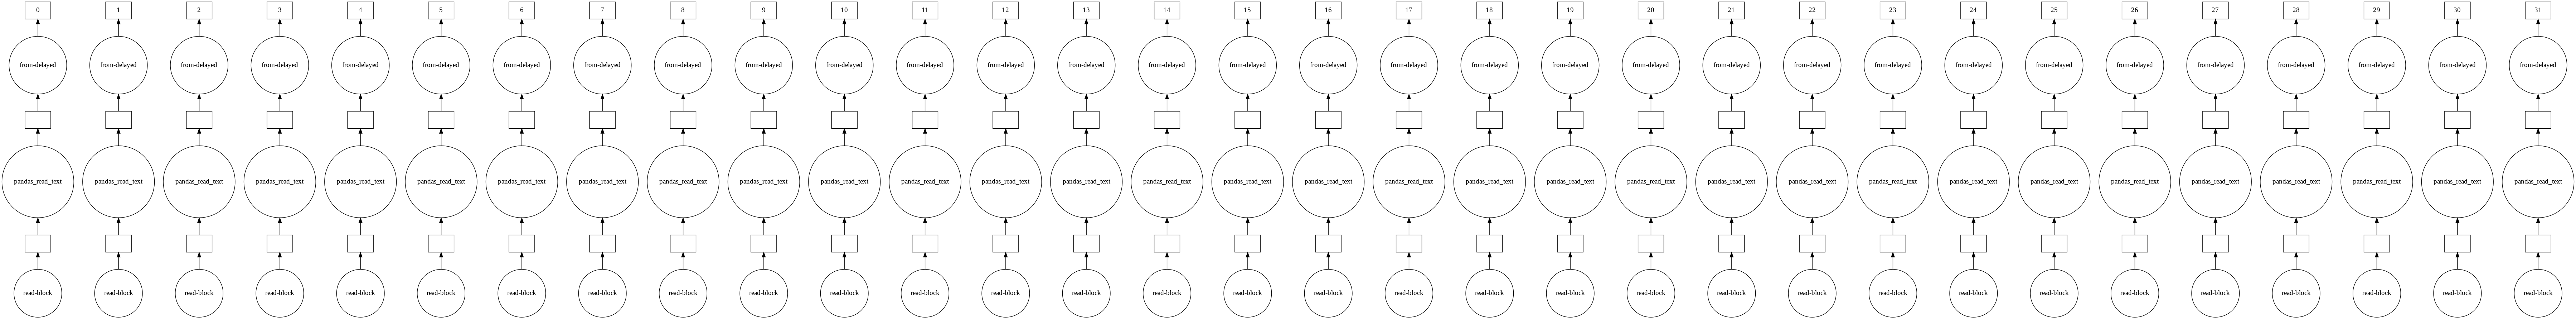

In [5]:
# However unlike Pandas, operations on dask.dataframes don't trigger immediate computation, 
# instead they add key-value pairs to an underlying Dask graph. Recall that in the diagram below, 
# circles are operations and rectangles are results.

# to see the visulaization you need to install graphviz
# pip3 install graphviz if this doesnt work please check the install_graphviz.jpg in the drive
month.visualize()

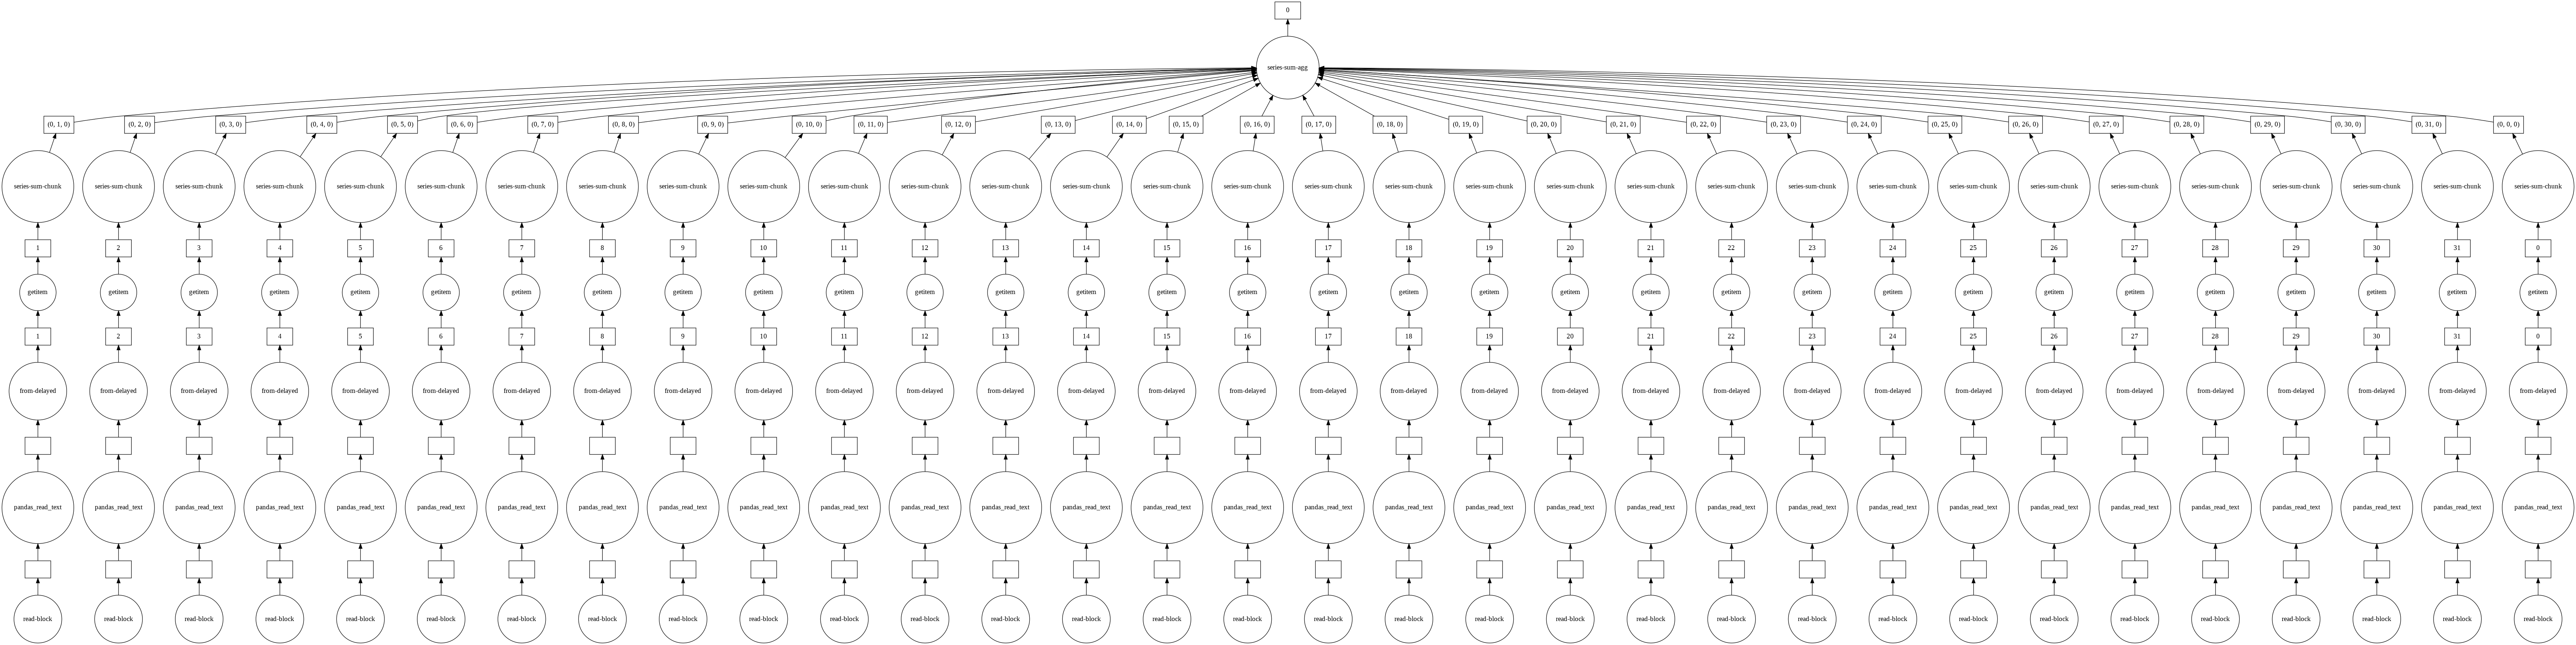

In [6]:
month.fare_amount.sum().visualize()

## Features in the dataset:
<table border="1">
	<tr>
		<th>Field Name</th>
		<th>Description</th>
	</tr>
	<tr>
		<td>VendorID</td>
		<td>
		A code indicating the TPEP provider that provided the record.
		<ol>
			<li>Creative Mobile Technologies</li>
			<li>VeriFone Inc.</li>
		</ol>
		</td>
	</tr>
	<tr>
		<td>tpep_pickup_datetime</td>
		<td>The date and time when the meter was engaged.</td>
	</tr>
	<tr>
		<td>tpep_dropoff_datetime</td>
		<td>The date and time when the meter was disengaged.</td>
	</tr>
	<tr>
		<td>Passenger_count</td>
		<td>The number of passengers in the vehicle. This is a driver-entered value.</td>
	</tr>
	<tr>
		<td>Trip_distance</td>
		<td>The elapsed trip distance in miles reported by the taximeter.</td>
	</tr>
	<tr>
		<td>Pickup_longitude</td>
		<td>Longitude where the meter was engaged.</td>
	</tr>
	<tr>
		<td>Pickup_latitude</td>
		<td>Latitude where the meter was engaged.</td>
	</tr>
	<tr>
		<td>RateCodeID</td>
		<td>The final rate code in effect at the end of the trip.
		<ol>
			<li> Standard rate </li>
			<li> JFK </li>
			<li> Newark </li>
			<li> Nassau or Westchester</li>
			<li> Negotiated fare </li>
			<li> Group ride</li>
		</ol>
		</td>
	</tr>
	<tr>
		<td>Store_and_fwd_flag</td>
		<td>This flag indicates whether the trip record was held in vehicle memory before sending to the vendor,<br\> aka “store and forward,” because the vehicle did not have a connection to the server.
		<br\>Y= store and forward trip
		<br\>N= not a store and forward trip
		</td>
	</tr>

	<tr>
		<td>Dropoff_longitude</td>
		<td>Longitude where the meter was disengaged.</td>
	</tr>
	<tr>
		<td>Dropoff_ latitude</td>
		<td>Latitude where the meter was disengaged.</td>
	</tr>
	<tr>
		<td>Payment_type</td>
		<td>A numeric code signifying how the passenger paid for the trip.
		<ol>
			<li> Credit card </li>
			<li> Cash </li>
			<li> No charge </li>
			<li> Dispute</li>
			<li> Unknown </li>
			<li> Voided trip</li>
		</ol>
		</td>
	</tr>
	<tr>
		<td>Fare_amount</td>
		<td>The time-and-distance fare calculated by the meter.</td>
	</tr>
	<tr>
		<td>Extra</td>
		<td>Miscellaneous extras and surcharges. Currently, this only includes. the $0.50 and $1 rush hour and overnight charges.</td>
	</tr>
	<tr>
		<td>MTA_tax</td>
		<td>0.50 MTA tax that is automatically triggered based on the metered rate in use.</td>
	</tr>
	<tr>
		<td>Improvement_surcharge</td>
		<td>0.30 improvement surcharge assessed trips at the flag drop. the improvement surcharge began being levied in 2015.</td>
	</tr>
	<tr>
		<td>Tip_amount</td>
		<td>Tip amount – This field is automatically populated for credit card tips.Cash tips are not included.</td>
	</tr>
	<tr>
		<td>Tolls_amount</td>
		<td>Total amount of all tolls paid in trip.</td>
	</tr>
	<tr>
		<td>Total_amount</td>
		<td>The total amount charged to passengers. Does not include cash tips.</td>
	</tr>
</table>

# ML Problem Formulation
<p><b> Time-series forecasting and Regression</b></p>
<br>
-<i> To find number of pickups, given location cordinates(latitude and longitude) and time, in the query reigion and surrounding regions.</i>
<p> 
To solve the above we would be using data collected in Jan - Mar 2015 to predict the pickups in Jan - Mar 2016.
</p>

# Performance metrics
1. Mean Absolute percentage error.
2. Mean Squared error.

## Data Cleaning

In this section we will be doing univariate analysis and removing outlier/illegitimate values which may be caused due to some error

In [7]:
#table below shows few datapoints along with all our features
month.head(5)

VendorID tpep_pickup_datetime  ... improvement_surcharge  total_amount
0         2  2015-01-15 19:05:39  ...                   0.3         17.05
1         1  2015-01-10 20:33:38  ...                   0.3         17.80
2         1  2015-01-10 20:33:38  ...                   0.3         10.80
3         1  2015-01-10 20:33:39  ...                   0.3          4.80
4         1  2015-01-10 20:33:39  ...                   0.3         16.30

[5 rows x 19 columns]

### 1. Pickup Latitude and Pickup Longitude

It is inferred from the source https://www.flickr.com/places/info/2459115 that New York is bounded by the location cordinates(lat,long) - (40.5774, -74.15) & (40.9176,-73.7004) so hence any cordinates not within these cordinates are not considered by us as we are only concerned with pickups which originate within New York.

In [8]:
# Plotting pickup cordinates which are outside the bounding box of New-York 
# we will collect all the points outside the bounding box of newyork city to outlier_locations
outlier_locations = month[((month.pickup_longitude <= -74.15) | (month.pickup_latitude <= 40.5774)| \
                   (month.pickup_longitude >= -73.7004) | (month.pickup_latitude >= 40.9176))]

# creating a map with the a base location
# read more about the folium here: http://folium.readthedocs.io/en/latest/quickstart.html

# note: you dont need to remember any of these, you dont need indeepth knowledge on these maps and plots

map_osm = folium.Map(location=[40.734695, -73.990372], tiles='Stamen Toner')

# we will spot only first 100 outliers on the map, plotting all the outliers will take more time
sample_locations = outlier_locations.head(10000)
for i,j in sample_locations.iterrows():
    if int(j['pickup_latitude']) != 0:
        folium.Marker(list((j['pickup_latitude'],j['pickup_longitude']))).add_to(map_osm)
map_osm

<b>Observation:-</b> As you can see above that there are some points just outside the boundary but there are a few that are in either South america, Mexico or Canada

### 2. Dropoff Latitude & Dropoff Longitude

It is inferred from the source https://www.flickr.com/places/info/2459115 that New York is bounded by the location cordinates(lat,long) - (40.5774, -74.15) & (40.9176,-73.7004) so hence any cordinates not within these cordinates are not considered by us as we are only concerned with dropoffs which are within New York.

In [9]:
# Plotting dropoff cordinates which are outside the bounding box of New-York 
# we will collect all the points outside the bounding box of newyork city to outlier_locations
outlier_locations = month[((month.dropoff_longitude <= -74.15) | (month.dropoff_latitude <= 40.5774)| \
                   (month.dropoff_longitude >= -73.7004) | (month.dropoff_latitude >= 40.9176))]

# creating a map with the a base location
# read more about the folium here: http://folium.readthedocs.io/en/latest/quickstart.html

# note: you dont need to remember any of these, you dont need indeepth knowledge on these maps and plots

map_osm = folium.Map(location=[40.734695, -73.990372], tiles='Stamen Toner')

# we will spot only first 100 outliers on the map, plotting all the outliers will take more time
sample_locations = outlier_locations.head(10000)
for i,j in sample_locations.iterrows():
    if int(j['pickup_latitude']) != 0:
        folium.Marker(list((j['dropoff_latitude'],j['dropoff_longitude']))).add_to(map_osm)
map_osm

<b>Observation:-</b> The observations here are similar to those obtained while analysing pickup latitude and longitude

### 3. Trip Durations:

<p style="font-size:18px">According to NYC Taxi &amp; Limousine Commision Regulations <b style= "color:blue">the maximum allowed trip duration in a 24 hour interval is 12 hours.</b> </p>

In [10]:
#The timestamps are converted to unix so as to get duration(trip-time) & speed also pickup-times in unix are used while binning 

# in out data we have time in the formate "YYYY-MM-DD HH:MM:SS" we convert thiss sting to python time formate and then into unix time stamp
# https://stackoverflow.com/a/27914405
import time
import datetime

def convert_to_unix(s):
    return time.mktime(datetime.datetime.strptime(s, "%Y-%m-%d %H:%M:%S").timetuple())



# we return a data frame which contains the columns
# 1.'passenger_count' : self explanatory
# 2.'trip_distance' : self explanatory
# 3.'pickup_longitude' : self explanatory
# 4.'pickup_latitude' : self explanatory
# 5.'dropoff_longitude' : self explanatory
# 6.'dropoff_latitude' : self explanatory
# 7.'total_amount' : total fair that was paid
# 8.'trip_times' : duration of each trip
# 9.'pickup_times : pickup time converted into unix time 
# 10.'Speed' : velocity of each trip
def return_with_trip_times(month):
    duration = month[['tpep_pickup_datetime','tpep_dropoff_datetime']].compute()
    #pickups and dropoffs to unix time
    duration_pickup = [convert_to_unix(x) for x in duration['tpep_pickup_datetime'].values]
    duration_drop = [convert_to_unix(x) for x in duration['tpep_dropoff_datetime'].values]
    #calculate duration of trips
    durations = (np.array(duration_drop) - np.array(duration_pickup))/float(60)

    #append durations of trips and speed in miles/hr to a new dataframe
    new_frame = month[['passenger_count','trip_distance','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','total_amount']].compute()
    
    new_frame['trip_times'] = durations
    new_frame['pickup_times'] = duration_pickup
    new_frame['Speed'] = 60*(new_frame['trip_distance']/new_frame['trip_times'])
    
    return new_frame

# print(frame_with_durations.head())
#  passenger_count	trip_distance	pickup_longitude	pickup_latitude	dropoff_longitude	dropoff_latitude	total_amount	trip_times	pickup_times	Speed
#   1                  1.59	      -73.993896        	40.750111    	-73.974785      	40.750618           	17.05   	 18.050000	1.421329e+09	5.285319
#   1               	3.30    	-74.001648      	40.724243   	-73.994415      	40.759109           	17.80   	19.833333	1.420902e+09	9.983193
#   1               	1.80     	-73.963341      	40.802788     	-73.951820      	40.824413           	10.80   	10.050000	1.420902e+09	10.746269
#   1               	0.50    	-74.009087      	40.713818    	-74.004326       	40.719986           	4.80    	1.866667	1.420902e+09	16.071429
#   1               	3.00    	-73.971176      	40.762428    	-74.004181      	40.742653           	16.30   	19.316667	1.420902e+09	9.318378
frame_with_durations = return_with_trip_times(month)

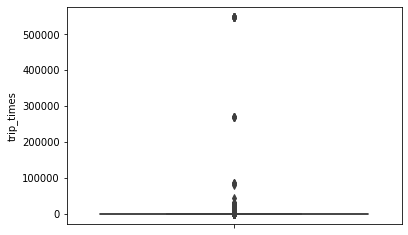

In [11]:
# the skewed box plot shows us the presence of outliers 
sns.boxplot(y="trip_times", data =frame_with_durations)
plt.show()

In [12]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,100,10):
    var =frame_with_durations["trip_times"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is -1211.0166666666667
10 percentile value is 3.8333333333333335
20 percentile value is 5.383333333333334
30 percentile value is 6.816666666666666
40 percentile value is 8.3
50 percentile value is 9.95
60 percentile value is 11.866666666666667
70 percentile value is 14.283333333333333
80 percentile value is 17.633333333333333
90 percentile value is 23.45
100 percentile value is  548555.6333333333


In [13]:
#looking further from the 99th percecntile
for i in range(90,100):
    var =frame_with_durations["trip_times"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 23.45
91 percentile value is 24.35
92 percentile value is 25.383333333333333
93 percentile value is 26.55
94 percentile value is 27.933333333333334
95 percentile value is 29.583333333333332
96 percentile value is 31.683333333333334
97 percentile value is 34.46666666666667
98 percentile value is 38.71666666666667
99 percentile value is 46.75
100 percentile value is  548555.6333333333


In [14]:
#removing data based on our analysis and TLC regulations
frame_with_durations_modified=frame_with_durations[(frame_with_durations.trip_times>1) & (frame_with_durations.trip_times<720)]

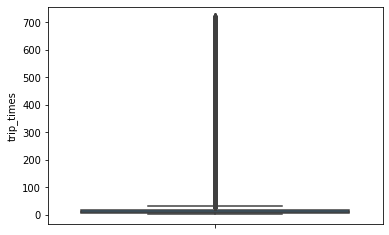

In [15]:
#box-plot after removal of outliers
sns.boxplot(y="trip_times", data =frame_with_durations_modified)
plt.show()

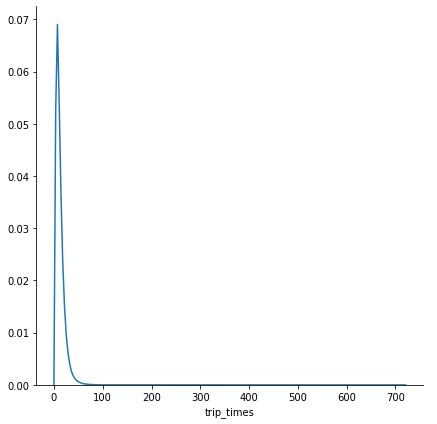

In [16]:
#pdf of trip-times after removing the outliers
sns.FacetGrid(frame_with_durations_modified,size=6) \
      .map(sns.kdeplot,"trip_times") \
      .add_legend();
plt.show();

In [17]:
#converting the values to log-values to chec for log-normal
import math
frame_with_durations_modified['log_times']=[math.log(i) for i in frame_with_durations_modified['trip_times'].values]

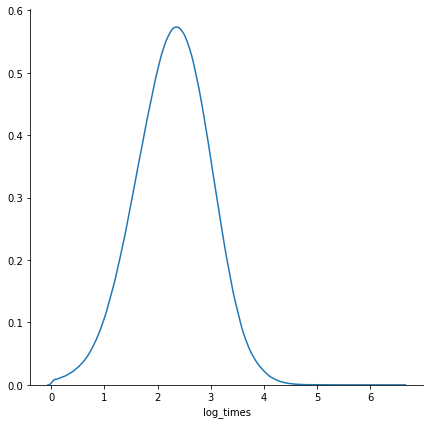

In [18]:
#pdf of log-values
sns.FacetGrid(frame_with_durations_modified,size=6) \
      .map(sns.kdeplot,"log_times") \
      .add_legend();
plt.show();

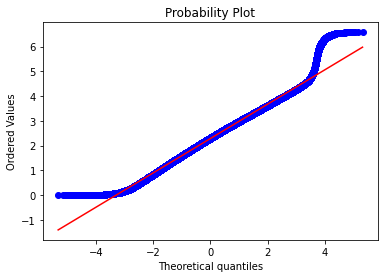

In [19]:
#Q-Q plot for checking if trip-times is log-normal
import scipy
scipy.stats.probplot(frame_with_durations_modified['log_times'].values, plot=plt)
plt.show()

### 4. Speed

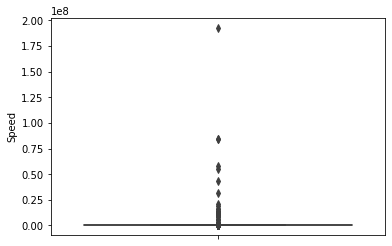

In [20]:
# check for any outliers in the data after trip duration outliers removed
# box-plot for speeds with outliers
frame_with_durations_modified['Speed'] = 60*(frame_with_durations_modified['trip_distance']/frame_with_durations_modified['trip_times'])
sns.boxplot(y="Speed", data =frame_with_durations_modified)
plt.show()

In [21]:
#calculating speed values at each percntile 0,10,20,30,40,50,60,70,80,90,100 
for i in range(0,100,10):
    var =frame_with_durations_modified["Speed"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

0 percentile value is 0.0
10 percentile value is 6.409495548961425
20 percentile value is 7.80952380952381
30 percentile value is 8.929133858267717
40 percentile value is 9.98019801980198
50 percentile value is 11.06865671641791
60 percentile value is 12.286689419795222
70 percentile value is 13.796407185628745
80 percentile value is 15.963224893917962
90 percentile value is 20.186915887850468
100 percentile value is  192857142.85714284


In [22]:
#calculating speed values at each percntile 90,91,92,93,94,95,96,97,98,99,100
for i in range(90,100):
    var =frame_with_durations_modified["Speed"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

90 percentile value is 20.186915887850468
91 percentile value is 20.91645569620253
92 percentile value is 21.752988047808763
93 percentile value is 22.721893491124263
94 percentile value is 23.844155844155843
95 percentile value is 25.182552504038775
96 percentile value is 26.80851063829787
97 percentile value is 28.84304932735426
98 percentile value is 31.591128254580514
99 percentile value is 35.7513566847558
100 percentile value is  192857142.85714284


In [23]:
#calculating speed values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var =frame_with_durations_modified["Speed"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 35.7513566847558
99.1 percentile value is 36.31084727468969
99.2 percentile value is 36.91470054446461
99.3 percentile value is 37.588235294117645
99.4 percentile value is 38.33035714285714
99.5 percentile value is 39.17580340264651
99.6 percentile value is 40.15384615384615
99.7 percentile value is 41.338301043219076
99.8 percentile value is 42.86631016042781
99.9 percentile value is 45.3107822410148
100 percentile value is  192857142.85714284


In [24]:
#removing further outliers based on the 99.9th percentile value
frame_with_durations_modified=frame_with_durations[(frame_with_durations.Speed>0) & (frame_with_durations.Speed<45.31)]

In [25]:
#avg.speed of cabs in New-York
sum(frame_with_durations_modified["Speed"]) / float(len(frame_with_durations_modified["Speed"]))

12.450173996027528

<b style='font-size:16px'>The avg speed in Newyork speed is 12.45miles/hr, so a cab driver can travel <font color='blue'> 2 miles per 10min on avg.</font> </b>

### 4. Trip Distance

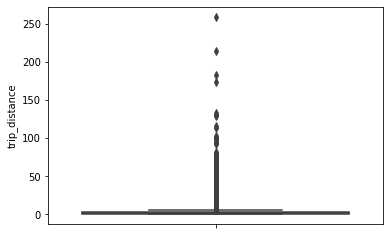

In [26]:
# up to now we have removed the outliers based on trip durations and cab speeds
# lets try if there are any outliers in trip distances
# box-plot showing outliers in trip-distance values
sns.boxplot(y="trip_distance", data =frame_with_durations_modified)
plt.show()

In [27]:
#calculating trip distance values at each percntile 0,10,20,30,40,50,60,70,80,90,100 
for i in range(0,100,10):
    var =frame_with_durations_modified["trip_distance"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

0 percentile value is 0.01
10 percentile value is 0.66
20 percentile value is 0.9
30 percentile value is 1.1
40 percentile value is 1.39
50 percentile value is 1.69
60 percentile value is 2.07
70 percentile value is 2.6
80 percentile value is 3.6
90 percentile value is 5.97
100 percentile value is  258.9


In [28]:
#calculating trip distance values at each percntile 90,91,92,93,94,95,96,97,98,99,100
for i in range(90,100):
    var =frame_with_durations_modified["trip_distance"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

90 percentile value is 5.97
91 percentile value is 6.45
92 percentile value is 7.07
93 percentile value is 7.85
94 percentile value is 8.72
95 percentile value is 9.6
96 percentile value is 10.6
97 percentile value is 12.1
98 percentile value is 16.03
99 percentile value is 18.17
100 percentile value is  258.9


In [29]:
#calculating trip distance values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var =frame_with_durations_modified["trip_distance"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 18.17
99.1 percentile value is 18.37
99.2 percentile value is 18.6
99.3 percentile value is 18.83
99.4 percentile value is 19.13
99.5 percentile value is 19.5
99.6 percentile value is 19.96
99.7 percentile value is 20.5
99.8 percentile value is 21.22
99.9 percentile value is 22.57
100 percentile value is  258.9


In [30]:
#removing further outliers based on the 99.9th percentile value
frame_with_durations_modified=frame_with_durations[(frame_with_durations.trip_distance>0) & (frame_with_durations.trip_distance<23)]

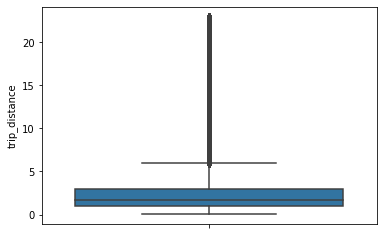

In [31]:
#box-plot after removal of outliers
sns.boxplot(y="trip_distance", data = frame_with_durations_modified)
plt.show()

### 5. Total Fare

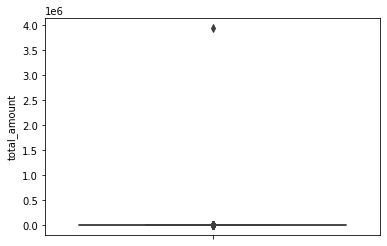

In [32]:
# up to now we have removed the outliers based on trip durations, cab speeds, and trip distances
# lets try if there are any outliers in based on the total_amount
# box-plot showing outliers in fare
sns.boxplot(y="total_amount", data =frame_with_durations_modified)
plt.show()

In [33]:
#calculating total fare amount values at each percntile 0,10,20,30,40,50,60,70,80,90,100 
for i in range(0,100,10):
    var = frame_with_durations_modified["total_amount"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

0 percentile value is -242.55
10 percentile value is 6.3
20 percentile value is 7.8
30 percentile value is 8.8
40 percentile value is 9.8
50 percentile value is 11.16
60 percentile value is 12.8
70 percentile value is 14.8
80 percentile value is 18.3
90 percentile value is 25.8
100 percentile value is  3950611.6


In [34]:
#calculating total fare amount values at each percntile 90,91,92,93,94,95,96,97,98,99,100
for i in range(90,100):
    var = frame_with_durations_modified["total_amount"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

90 percentile value is 25.8
91 percentile value is 27.3
92 percentile value is 29.3
93 percentile value is 31.8
94 percentile value is 34.8
95 percentile value is 38.53
96 percentile value is 42.6
97 percentile value is 48.13
98 percentile value is 58.13
99 percentile value is 66.13
100 percentile value is  3950611.6


In [35]:
#calculating total fare amount values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var = frame_with_durations_modified["total_amount"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 66.13
99.1 percentile value is 68.13
99.2 percentile value is 69.6
99.3 percentile value is 69.6
99.4 percentile value is 69.73
99.5 percentile value is 69.75
99.6 percentile value is 69.76
99.7 percentile value is 72.58
99.8 percentile value is 75.35
99.9 percentile value is 88.28
100 percentile value is  3950611.6


<b>Observation:-</b> As even the 99.9th percentile value doesnt look like an outlier,as there is not much difference between the 99.8th percentile and 99.9th percentile, we move on to do graphical analyis

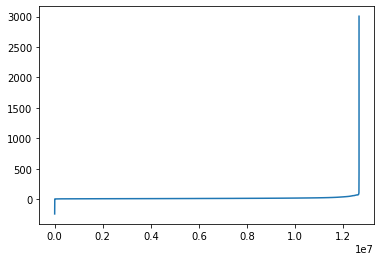

In [36]:
#below plot shows us the fare values(sorted) to find a sharp increase to remove those values as outliers
# plot the fare amount excluding last two values in sorted data
plt.plot(var[:-2])
plt.show()

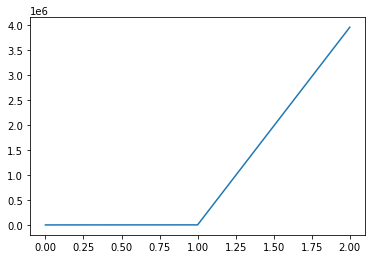

In [37]:
# a very sharp increase in fare values can be seen 
# plotting last three total fare values, and we can observe there is share increase in the values
plt.plot(var[-3:])
plt.show()

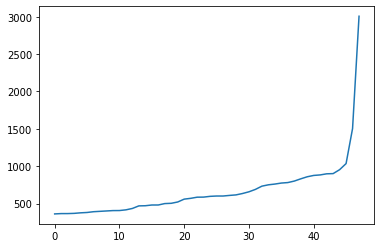

In [38]:
#now looking at values not including the last two points we again find a drastic increase at around 1000 fare value
# we plot last 50 values excluding last two values
plt.plot(var[-50:-2])
plt.show()

## Remove all outliers/erronous points.

In [39]:
#removing all outliers based on our univariate analysis above
def remove_outliers(new_frame):

    
    a = new_frame.shape[0]
    print ("Number of pickup records = ",a)
    temp_frame = new_frame[((new_frame.dropoff_longitude >= -74.15) & (new_frame.dropoff_longitude <= -73.7004) &\
                       (new_frame.dropoff_latitude >= 40.5774) & (new_frame.dropoff_latitude <= 40.9176)) & \
                       ((new_frame.pickup_longitude >= -74.15) & (new_frame.pickup_latitude >= 40.5774)& \
                       (new_frame.pickup_longitude <= -73.7004) & (new_frame.pickup_latitude <= 40.9176))]
    b = temp_frame.shape[0]
    print ("Number of outlier coordinates lying outside NY boundaries:",(a-b))

    
    temp_frame = new_frame[(new_frame.trip_times > 0) & (new_frame.trip_times < 720)]
    c = temp_frame.shape[0]
    print ("Number of outliers from trip times analysis:",(a-c))
    
    
    temp_frame = new_frame[(new_frame.trip_distance > 0) & (new_frame.trip_distance < 23)]
    d = temp_frame.shape[0]
    print ("Number of outliers from trip distance analysis:",(a-d))
    
    temp_frame = new_frame[(new_frame.Speed <= 65) & (new_frame.Speed >= 0)]
    e = temp_frame.shape[0]
    print ("Number of outliers from speed analysis:",(a-e))
    
    temp_frame = new_frame[(new_frame.total_amount <1000) & (new_frame.total_amount >0)]
    f = temp_frame.shape[0]
    print ("Number of outliers from fare analysis:",(a-f))
    
    
    new_frame = new_frame[((new_frame.dropoff_longitude >= -74.15) & (new_frame.dropoff_longitude <= -73.7004) &\
                       (new_frame.dropoff_latitude >= 40.5774) & (new_frame.dropoff_latitude <= 40.9176)) & \
                       ((new_frame.pickup_longitude >= -74.15) & (new_frame.pickup_latitude >= 40.5774)& \
                       (new_frame.pickup_longitude <= -73.7004) & (new_frame.pickup_latitude <= 40.9176))]
    
    new_frame = new_frame[(new_frame.trip_times > 0) & (new_frame.trip_times < 720)]
    new_frame = new_frame[(new_frame.trip_distance > 0) & (new_frame.trip_distance < 23)]
    new_frame = new_frame[(new_frame.Speed < 45.31) & (new_frame.Speed > 0)]
    new_frame = new_frame[(new_frame.total_amount <1000) & (new_frame.total_amount >0)]
    
    print ("Total outliers removed",a - new_frame.shape[0])
    print ("---")
    return new_frame

In [40]:
print ("Removing outliers in the month of Jan-2015")
print ("----")
frame_with_durations_outliers_removed = remove_outliers(frame_with_durations)
print("fraction of data points that remain after removing outliers", float(len(frame_with_durations_outliers_removed))/len(frame_with_durations))

Removing outliers in the month of Jan-2015
----
Number of pickup records =  12748986
Number of outlier coordinates lying outside NY boundaries: 293919
Number of outliers from trip times analysis: 23889
Number of outliers from trip distance analysis: 92597
Number of outliers from speed analysis: 24473
Number of outliers from fare analysis: 5275
Total outliers removed 377910
---
fraction of data points that remain after removing outliers 0.9703576425607495


# Data-preperation
## Clustering/Segmentation

In [41]:
#trying different cluster sizes to choose the right K in K-means
coords = frame_with_durations_outliers_removed[['pickup_latitude', 'pickup_longitude']].values
neighbours=[]

def find_min_distance(cluster_centers, cluster_len):
    nice_points = 0
    wrong_points = 0
    less2 = []
    more2 = []
    min_dist=1000
    for i in range(0, cluster_len):
        nice_points = 0
        wrong_points = 0
        for j in range(0, cluster_len):
            if j!=i:
                distance = gpxpy.geo.haversine_distance(cluster_centers[i][0], cluster_centers[i][1],cluster_centers[j][0], cluster_centers[j][1])
                min_dist = min(min_dist,distance/(1.60934*1000))
                if (distance/(1.60934*1000)) <= 2:
                    nice_points +=1
                else:
                    wrong_points += 1
        less2.append(nice_points)
        more2.append(wrong_points)
    neighbours.append(less2)
    print ("On choosing a cluster size of ",cluster_len,"\nAvg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2):", np.ceil(sum(less2)/len(less2)), "\nAvg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2):", np.ceil(sum(more2)/len(more2)),"\nMin inter-cluster distance = ",min_dist,"\n---")

def find_clusters(increment):
    kmeans = MiniBatchKMeans(n_clusters=increment, batch_size=10000,random_state=42).fit(coords)
    frame_with_durations_outliers_removed['pickup_cluster'] = kmeans.predict(frame_with_durations_outliers_removed[['pickup_latitude', 'pickup_longitude']])
    cluster_centers = kmeans.cluster_centers_
    cluster_len = len(cluster_centers)
    return cluster_centers, cluster_len

# we need to choose number of clusters so that, there are more number of cluster regions 
#that are close to any cluster center
# and make sure that the minimum inter cluster should not be very less
for increment in range(10, 100, 10):
    cluster_centers, cluster_len = find_clusters(increment)
    find_min_distance(cluster_centers, cluster_len)            

On choosing a cluster size of  10 
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 2.0 
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): 8.0 
Min inter-cluster distance =  1.0945442325142662 
---
On choosing a cluster size of  20 
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 4.0 
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): 16.0 
Min inter-cluster distance =  0.7131298007388065 
---
On choosing a cluster size of  30 
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 8.0 
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): 22.0 
Min inter-cluster distance =  0.5185088176172186 
---
On choosing a cluster size of  40 
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 8.0 
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): 32.0 
Min inter-cluster distance 

### Inference:
- The main objective was to find a optimal min. distance(Which roughly estimates to the radius of a cluster) between the clusters which we got was 40

In [42]:
# if check for the 50 clusters you can observe that there are two clusters with only 0.3 miles apart from each other
# so we choose 40 clusters for solve the further problem

# Getting 40 clusters using the kmeans 
kmeans = MiniBatchKMeans(n_clusters=40, batch_size=10000,random_state=0).fit(coords)
frame_with_durations_outliers_removed['pickup_cluster'] = kmeans.predict(frame_with_durations_outliers_removed[['pickup_latitude', 'pickup_longitude']])

### Plotting the cluster centers:

In [43]:
# Plotting the cluster centers on OSM
cluster_centers = kmeans.cluster_centers_
cluster_len = len(cluster_centers)
map_osm = folium.Map(location=[40.734695, -73.990372], tiles='Stamen Toner')
for i in range(cluster_len):
    folium.Marker(list((cluster_centers[i][0],cluster_centers[i][1])), popup=(str(cluster_centers[i][0])+str(cluster_centers[i][1]))).add_to(map_osm)
map_osm

### Plotting the clusters:

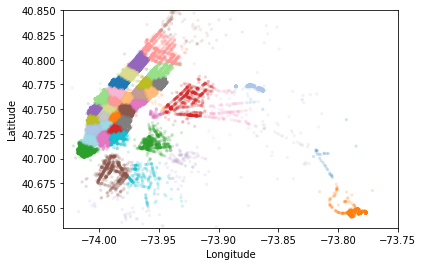

In [44]:
#Visualising the clusters on a map
def plot_clusters(frame):
    city_long_border = (-74.03, -73.75)
    city_lat_border = (40.63, 40.85)
    fig, ax = plt.subplots(ncols=1, nrows=1)
    ax.scatter(frame.pickup_longitude.values[:100000], frame.pickup_latitude.values[:100000], s=10, lw=0,
               c=frame.pickup_cluster.values[:100000], cmap='tab20', alpha=0.2)
    ax.set_xlim(city_long_border)
    ax.set_ylim(city_lat_border)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    plt.show()

plot_clusters(frame_with_durations_outliers_removed)

## Time-binning

In [45]:
#Refer:https://www.unixtimestamp.com/
# 1420070400 : 2015-01-01 00:00:00 
# 1422748800 : 2015-02-01 00:00:00 
# 1425168000 : 2015-03-01 00:00:00
# 1427846400 : 2015-04-01 00:00:00 
# 1430438400 : 2015-05-01 00:00:00 
# 1433116800 : 2015-06-01 00:00:00

# 1451606400 : 2016-01-01 00:00:00 
# 1454284800 : 2016-02-01 00:00:00 
# 1456790400 : 2016-03-01 00:00:00
# 1459468800 : 2016-04-01 00:00:00 
# 1462060800 : 2016-05-01 00:00:00 
# 1464739200 : 2016-06-01 00:00:00

def add_pickup_bins(frame,month,year):
    unix_pickup_times=[i for i in frame['pickup_times'].values]
    unix_times = [[1420070400,1422748800,1425168000,1427846400,1430438400,1433116800],\
                    [1451606400,1454284800,1456790400,1459468800,1462060800,1464739200]]
    
    start_pickup_unix=unix_times[year-2015][month-1]
    # https://www.timeanddate.com/time/zones/est
    # (int((i-start_pickup_unix)/600)+33) : our unix time is in gmt to we are converting it to est
    tenminutewise_binned_unix_pickup_times=[(int((i-start_pickup_unix)/600)+33) for i in unix_pickup_times]
    frame['pickup_bins'] = np.array(tenminutewise_binned_unix_pickup_times)
    return frame

In [46]:
# clustering, making pickup bins and grouping by pickup cluster and pickup bins
frame_with_durations_outliers_removed['pickup_cluster'] = kmeans.predict(frame_with_durations_outliers_removed[['pickup_latitude', 'pickup_longitude']])
jan_2015_frame = add_pickup_bins(frame_with_durations_outliers_removed,1,2015)
jan_2015_groupby = jan_2015_frame[['pickup_cluster','pickup_bins','trip_distance']].groupby(['pickup_cluster','pickup_bins']).count()

In [47]:
# we add two more columns 'pickup_cluster'(to which cluster it belogns to) 
# and 'pickup_bins' (to which 10min intravel the trip belongs to)
jan_2015_frame.head()

passenger_count  trip_distance  ...  pickup_cluster  pickup_bins
0                1           1.59  ...              34         2163
1                1           3.30  ...               2         1452
2                1           1.80  ...              16         1452
3                1           0.50  ...              38         1452
4                1           3.00  ...              22         1452

[5 rows x 12 columns]

In [48]:
# hear the trip_distance represents the number of pickups that are happend in that particular 10min intravel
# this data frame has two indices
# primary index: pickup_cluster (cluster number)
# secondary index : pickup_bins (we devid whole months time into 10min intravels 24*31*60/10 =4464bins)
jan_2015_groupby.head()

trip_distance
pickup_cluster pickup_bins               
0              33                     104
               34                     200
               35                     208
               36                     141
               37                     155

In [50]:
!wget wget --header="Host: doc-14-ac-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.164 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9,mr;q=0.8,hi;q=0.7" --header="Cookie: AUTH_q46k7vabprn388os568u85edon1j3ura_nonce=j3crnhq9gq8fm" --header="Connection: keep-alive" "https://doc-14-ac-docs.googleusercontent.com/docs/securesc/db86injf6p69hindc9q8h7m2jnoppbq6/0ogg0dtv9b6fhmpgfvcun6nomo5994m7/1626833625000/00470733829943800287/10548246969117594398/1twkOR0EqlRpID9Bmx04Qh5ZSfU_ctBaf?e=download&authuser=0&nonce=j3crnhq9gq8fm&user=10548246969117594398&hash=t55r2hpocaoluncp7lcip1sbuo6789ps" -c -O 'yellow_tripdata_2016-01.csv'

--2021-07-21 02:14:20--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2021-07-21 02:14:20--  https://doc-14-ac-docs.googleusercontent.com/docs/securesc/db86injf6p69hindc9q8h7m2jnoppbq6/0ogg0dtv9b6fhmpgfvcun6nomo5994m7/1626833625000/00470733829943800287/10548246969117594398/1twkOR0EqlRpID9Bmx04Qh5ZSfU_ctBaf?e=download&authuser=0&nonce=j3crnhq9gq8fm&user=10548246969117594398&hash=t55r2hpocaoluncp7lcip1sbuo6789ps
Resolving doc-14-ac-docs.googleusercontent.com (doc-14-ac-docs.googleusercontent.com)... 108.177.126.132, 2a00:1450:4013:c01::84
Connecting to doc-14-ac-docs.googleusercontent.com (doc-14-ac-docs.googleusercontent.com)|108.177.126.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘yellow_tripdata_2016-01.csv’

yellow_tripdata_201     [   <=>              ]   1.59G  73.3MB/s    in 17s     

2021-07-21 02:14:38 (93.3 MB/s) - ‘yellow_tripdata_2016-0

In [51]:
!wget wget --header="Host: doc-00-ac-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.164 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9,mr;q=0.8,hi;q=0.7" --header="Cookie: AUTH_q46k7vabprn388os568u85edon1j3ura=10548246969117594398|1626833625000|u0d5fesjnhsfh8qcu3cv4jq9ttlqjt4o" --header="Connection: keep-alive" "https://doc-00-ac-docs.googleusercontent.com/docs/securesc/db86injf6p69hindc9q8h7m2jnoppbq6/e5q0o3h7c7vtmibq1b0o8thhl7aho51j/1626833625000/00470733829943800287/10548246969117594398/1C_PFI2ky8Q198ew6c01OobdA6G5KP084?e=download&authuser=0" -c -O 'yellow_tripdata_2016-02.csv'

--2021-07-21 02:14:47--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2021-07-21 02:14:47--  https://doc-00-ac-docs.googleusercontent.com/docs/securesc/db86injf6p69hindc9q8h7m2jnoppbq6/e5q0o3h7c7vtmibq1b0o8thhl7aho51j/1626833625000/00470733829943800287/10548246969117594398/1C_PFI2ky8Q198ew6c01OobdA6G5KP084?e=download&authuser=0
Resolving doc-00-ac-docs.googleusercontent.com (doc-00-ac-docs.googleusercontent.com)... 108.177.126.132, 2a00:1450:4013:c01::84
Connecting to doc-00-ac-docs.googleusercontent.com (doc-00-ac-docs.googleusercontent.com)|108.177.126.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘yellow_tripdata_2016-02.csv’

yellow_tripdata_201     [             <=>    ]   1.66G   139MB/s    in 13s     

2021-07-21 02:15:00 (135 MB/s) - ‘yellow_tripdata_2016-02.csv’ saved [1783554554]

FINISHED --2021-07-21 02:15:00--
Total wall clock time: 13

In [52]:
!wget wget --header="Host: doc-0k-ac-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.164 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9,mr;q=0.8,hi;q=0.7" --header="Cookie: AUTH_q46k7vabprn388os568u85edon1j3ura=10548246969117594398|1626833625000|u0d5fesjnhsfh8qcu3cv4jq9ttlqjt4o" --header="Connection: keep-alive" "https://doc-0k-ac-docs.googleusercontent.com/docs/securesc/db86injf6p69hindc9q8h7m2jnoppbq6/nll7e32pdv6knot06td75qgob8supt12/1626833625000/00470733829943800287/10548246969117594398/1glYyoofNdRaeKZ-1IBijfsa3tbBZPEIq?e=download&authuser=0" -c -O 'yellow_tripdata_2016-03.csv'

--2021-07-21 02:15:11--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2021-07-21 02:15:12--  https://doc-0k-ac-docs.googleusercontent.com/docs/securesc/db86injf6p69hindc9q8h7m2jnoppbq6/nll7e32pdv6knot06td75qgob8supt12/1626833625000/00470733829943800287/10548246969117594398/1glYyoofNdRaeKZ-1IBijfsa3tbBZPEIq?e=download&authuser=0
Resolving doc-0k-ac-docs.googleusercontent.com (doc-0k-ac-docs.googleusercontent.com)... 108.177.126.132, 2a00:1450:4013:c01::84
Connecting to doc-0k-ac-docs.googleusercontent.com (doc-0k-ac-docs.googleusercontent.com)|108.177.126.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘yellow_tripdata_2016-03.csv’

yellow_tripdata_201     [      <=>           ]   1.78G  55.5MB/s    in 24s     

2021-07-21 02:15:36 (77.2 MB/s) - ‘yellow_tripdata_2016-03.csv’ saved [1914669757]

FINISHED --2021-07-21 02:15:36--
Total wall clock time: 2

In [53]:
# upto now we cleaned data and prepared data for the month 2015,

# now do the same operations for months Jan, Feb, March of 2016
# 1. get the dataframe which inlcudes only required colums
# 2. adding trip times, speed, unix time stamp of pickup_time
# 4. remove the outliers based on trip_times, speed, trip_duration, total_amount
# 5. add pickup_cluster to each data point
# 6. add pickup_bin (index of 10min intravel to which that trip belongs to)
# 7. group by data, based on 'pickup_cluster' and 'pickuo_bin'

# Data Preparation for the months of Jan,Feb and March 2016
def datapreparation(month,kmeans,month_no,year_no):
    
    print ("Return with trip times..")

    frame_with_durations = return_with_trip_times(month)
    
    print ("Remove outliers..")
    frame_with_durations_outliers_removed = remove_outliers(frame_with_durations)
    
    print ("Estimating clusters..")
    frame_with_durations_outliers_removed['pickup_cluster'] = kmeans.predict(frame_with_durations_outliers_removed[['pickup_latitude', 'pickup_longitude']])
    #frame_with_durations_outliers_removed_2016['pickup_cluster'] = kmeans.predict(frame_with_durations_outliers_removed_2016[['pickup_latitude', 'pickup_longitude']])

    print ("Final groupbying..")
    final_updated_frame = add_pickup_bins(frame_with_durations_outliers_removed,month_no,year_no)
    final_groupby_frame = final_updated_frame[['pickup_cluster','pickup_bins','trip_distance']].groupby(['pickup_cluster','pickup_bins']).count()
    
    return final_updated_frame,final_groupby_frame
    
month_jan_2016 = dd.read_csv('yellow_tripdata_2016-01.csv')
month_feb_2016 = dd.read_csv('yellow_tripdata_2016-02.csv')
month_mar_2016 = dd.read_csv('yellow_tripdata_2016-03.csv')

jan_2016_frame,jan_2016_groupby = datapreparation(month_jan_2016,kmeans,1,2016)
feb_2016_frame,feb_2016_groupby = datapreparation(month_feb_2016,kmeans,2,2016)
mar_2016_frame,mar_2016_groupby = datapreparation(month_mar_2016,kmeans,3,2016)

Return with trip times..
Remove outliers..
Number of pickup records =  10906858
Number of outlier coordinates lying outside NY boundaries: 214677
Number of outliers from trip times analysis: 27190
Number of outliers from trip distance analysis: 79742
Number of outliers from speed analysis: 21047
Number of outliers from fare analysis: 4991
Total outliers removed 297784
---
Estimating clusters..
Final groupbying..
Return with trip times..
Remove outliers..
Number of pickup records =  11382049
Number of outlier coordinates lying outside NY boundaries: 223161
Number of outliers from trip times analysis: 27670
Number of outliers from trip distance analysis: 81902
Number of outliers from speed analysis: 22437
Number of outliers from fare analysis: 5476
Total outliers removed 308177
---
Estimating clusters..
Final groupbying..
Return with trip times..
Remove outliers..
Number of pickup records =  12210952
Number of outlier coordinates lying outside NY boundaries: 232444
Number of outliers fro

In [54]:
jan_2016_frame.head()

passenger_count  trip_distance  ...  pickup_cluster  pickup_bins
5                2           5.52  ...              28           33
6                2           7.45  ...              24           33
7                1           1.20  ...              21           33
8                1           6.00  ...              10           33
9                1           3.21  ...              24           33

[5 rows x 12 columns]

## Smoothing

In [55]:
# Gets the unique bins where pickup values are present for each each reigion

# for each cluster region we will collect all the indices of 10min intravels in which the pickups are happened
# we got an observation that there are some pickpbins that doesnt have any pickups
def return_unq_pickup_bins(frame):
    values = []
    for i in range(0,40):
        new = frame[frame['pickup_cluster'] == i]
        list_unq = list(set(new['pickup_bins']))
        list_unq.sort()
        values.append(list_unq)
    return values

In [56]:
# for every month we get all indices of 10min intravels in which atleast one pickup got happened

#jan
jan_2015_unique = return_unq_pickup_bins(jan_2015_frame)
jan_2016_unique = return_unq_pickup_bins(jan_2016_frame)

#feb
feb_2016_unique = return_unq_pickup_bins(feb_2016_frame)

#march
mar_2016_unique = return_unq_pickup_bins(mar_2016_frame)

In [57]:
# for each cluster number of 10min intravels with 0 pickups
for i in range(40):
    print("for the ",i,"th cluster number of 10min intavels with zero pickups: ",4464 - len(set(jan_2015_unique[i])))
    print('-'*60)

for the  0 th cluster number of 10min intavels with zero pickups:  40
------------------------------------------------------------
for the  1 th cluster number of 10min intavels with zero pickups:  1985
------------------------------------------------------------
for the  2 th cluster number of 10min intavels with zero pickups:  29
------------------------------------------------------------
for the  3 th cluster number of 10min intavels with zero pickups:  354
------------------------------------------------------------
for the  4 th cluster number of 10min intavels with zero pickups:  37
------------------------------------------------------------
for the  5 th cluster number of 10min intavels with zero pickups:  153
------------------------------------------------------------
for the  6 th cluster number of 10min intavels with zero pickups:  34
------------------------------------------------------------
for the  7 th cluster number of 10min intavels with zero pickups:  34
---------

there are two ways to fill up these values
<ul>
<li> Fill the missing value with 0's</li>
<li> Fill the missing values with the avg values
<ul>
<li> Case 1:(values missing at the start)  <br>Ex1: \_ \_ \_ x =>ceil(x/4), ceil(x/4), ceil(x/4), ceil(x/4) <br> Ex2: \_ \_ x => ceil(x/3), ceil(x/3), ceil(x/3) </li>
<li> Case 2:(values missing in middle) <br>Ex1: x \_ \_ y => ceil((x+y)/4), ceil((x+y)/4), ceil((x+y)/4), ceil((x+y)/4) <br> Ex2: x \_ \_ \_ y => ceil((x+y)/5), ceil((x+y)/5), ceil((x+y)/5), ceil((x+y)/5), ceil((x+y)/5) </li>
<li> Case 3:(values missing at the end)  <br>Ex1: x \_ \_ \_  => ceil(x/4), ceil(x/4), ceil(x/4), ceil(x/4) <br> Ex2: x \_  => ceil(x/2), ceil(x/2) </li>
</ul>
</li>
</ul>

In [58]:
# Fills a value of zero for every bin where no pickup data is present 
# the count_values: number pickps that are happened in each region for each 10min intravel
# there wont be any value if there are no picksups.
# values: number of unique bins

# for every 10min intravel(pickup_bin) we will check it is there in our unique bin,
# if it is there we will add the count_values[index] to smoothed data
# if not we add 0 to the smoothed data
# we finally return smoothed data
def fill_missing(count_values,values):
    smoothed_regions=[]
    ind=0
    for r in range(0,40):
        smoothed_bins=[]
        for i in range(4464):
            if i in values[r]:
                smoothed_bins.append(count_values[ind])
                ind+=1
            else:
                smoothed_bins.append(0)
        smoothed_regions.extend(smoothed_bins)
    return smoothed_regions

In [59]:
# Fills a value of zero for every bin where no pickup data is present 
# the count_values: number pickps that are happened in each region for each 10min intravel
# there wont be any value if there are no picksups.
# values: number of unique bins

# for every 10min intravel(pickup_bin) we will check it is there in our unique bin,
# if it is there we will add the count_values[index] to smoothed data
# if not we add smoothed data (which is calculated based on the methods that are discussed in the above markdown cell)
# we finally return smoothed data
def smoothing(count_values,values):
    smoothed_regions=[] # stores list of final smoothed values of each reigion
    ind=0
    repeat=0 
    smoothed_value=0
    for r in range(0,40):
        smoothed_bins=[] #stores the final smoothed values
        repeat=0
        for i in range(4464):
            if repeat!=0: # prevents iteration for a value which is already visited/resolved
                repeat-=1
                continue
            if i in values[r]: #checks if the pickup-bin exists 
                smoothed_bins.append(count_values[ind]) # appends the value of the pickup bin if it exists
            else:
                if i!=0:
                    right_hand_limit=0
                    for j in range(i,4464):
                        if  j not in values[r]: #searches for the left-limit or the pickup-bin value which has a pickup value
                            continue
                        else:
                            right_hand_limit=j
                            break
                    if right_hand_limit==0:
                    #Case 1: When we have the last/last few values are found to be missing,hence we have no right-limit here
                        smoothed_value=count_values[ind-1]*1.0/((4463-i)+2)*1.0                               
                        for j in range(i,4464):                              
                            smoothed_bins.append(math.ceil(smoothed_value))
                        smoothed_bins[i-1] = math.ceil(smoothed_value)
                        repeat=(4463-i)
                        ind-=1
                    else:
                    #Case 2: When we have the missing values between two known values
                        smoothed_value=(count_values[ind-1]+count_values[ind])*1.0/((right_hand_limit-i)+2)*1.0             
                        for j in range(i,right_hand_limit+1):
                            smoothed_bins.append(math.ceil(smoothed_value))
                        smoothed_bins[i-1] = math.ceil(smoothed_value)
                        repeat=(right_hand_limit-i)
                else:
                    #Case 3: When we have the first/first few values are found to be missing,hence we have no left-limit here
                    right_hand_limit=0
                    for j in range(i,4464):
                        if  j not in values[r]:
                            continue
                        else:
                            right_hand_limit=j
                            break
                    smoothed_value=count_values[ind]*1.0/((right_hand_limit-i)+1)*1.0
                    for j in range(i,right_hand_limit+1):
                            smoothed_bins.append(math.ceil(smoothed_value))
                    repeat=(right_hand_limit-i)
            ind+=1
        smoothed_regions.extend(smoothed_bins)
    return smoothed_regions


In [60]:
#Filling Missing values of Jan-2015 with 0
# here in jan_2015_groupby dataframe the trip_distance represents the number of pickups that are happened
jan_2015_fill = fill_missing(jan_2015_groupby['trip_distance'].values,jan_2015_unique)

#Smoothing Missing values of Jan-2015
jan_2015_smooth = smoothing(jan_2015_groupby['trip_distance'].values,jan_2015_unique)

In [61]:
# number of 10min indices for jan 2015= 24*31*60/10 = 4464
# number of 10min indices for jan 2016 = 24*31*60/10 = 4464
# number of 10min indices for feb 2016 = 24*29*60/10 = 4176
# number of 10min indices for march 2016 = 24*30*60/10 = 4320
# for each cluster we will have 4464 values, therefore 40*4464 = 178560 (length of the jan_2015_fill)
print("number of 10min intravels among all the clusters ",len(jan_2015_fill))

number of 10min intravels among all the clusters  178560


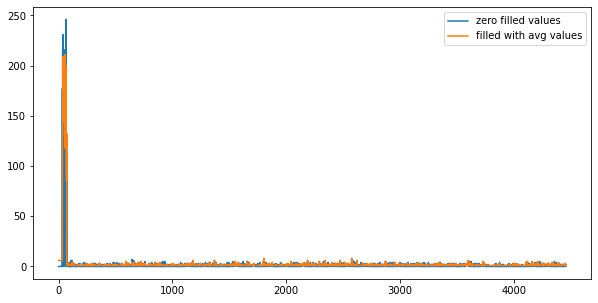

In [62]:
# Smoothing vs Filling
# sample plot that shows two variations of filling missing values
# we have taken the number of pickups for cluster region 2
plt.figure(figsize=(10,5))
plt.plot(jan_2015_fill[4464:8920], label="zero filled values")
plt.plot(jan_2015_smooth[4464:8920], label="filled with avg values")
plt.legend()
plt.show()

In [63]:
# why we choose, these methods and which method is used for which data?

# Ans: consider we have data of some month in 2015 jan 1st, 10 _ _ _ 20, i.e there are 10 pickups that are happened in 1st 
# 10st 10min intravel, 0 pickups happened in 2nd 10mins intravel, 0 pickups happened in 3rd 10min intravel 
# and 20 pickups happened in 4th 10min intravel.
# in fill_missing method we replace these values like 10, 0, 0, 20
# where as in smoothing method we replace these values as 6,6,6,6,6, if you can check the number of pickups 
# that are happened in the first 40min are same in both cases, but if you can observe that we looking at the future values 
# wheen you are using smoothing we are looking at the future number of pickups which might cause a data leakage.

# so we use smoothing for jan 2015th data since it acts as our training data
# and we use simple fill_misssing method for 2016th data.

In [64]:
# Jan-2015 data is smoothed, Jan,Feb & March 2016 data missing values are filled with zero
jan_2015_smooth = smoothing(jan_2015_groupby['trip_distance'].values,jan_2015_unique)
jan_2016_smooth = fill_missing(jan_2016_groupby['trip_distance'].values,jan_2016_unique)
feb_2016_smooth = fill_missing(feb_2016_groupby['trip_distance'].values,feb_2016_unique)
mar_2016_smooth = fill_missing(mar_2016_groupby['trip_distance'].values,mar_2016_unique)

# Making list of all the values of pickup data in every bin for a period of 3 months and storing them region-wise 
regions_cum = []

# a =[1,2,3]
# b = [2,3,4]
# a+b = [1, 2, 3, 2, 3, 4]

# number of 10min indices for jan 2015= 24*31*60/10 = 4464
# number of 10min indices for jan 2016 = 24*31*60/10 = 4464
# number of 10min indices for feb 2016 = 24*29*60/10 = 4176
# number of 10min indices for march 2016 = 24*31*60/10 = 4464
# regions_cum: it will contain 40 lists, each list will contain 4464+4176+4464 values which represents the number of pickups 
# that are happened for three months in 2016 data

for i in range(0,40):
    regions_cum.append(jan_2016_smooth[4464*i:4464*(i+1)]+feb_2016_smooth[4176*i:4176*(i+1)]+mar_2016_smooth[4464*i:4464*(i+1)])

# print(len(regions_cum))
# 40
# print(len(regions_cum[0]))
# 13104

## Time series and Fourier Transforms

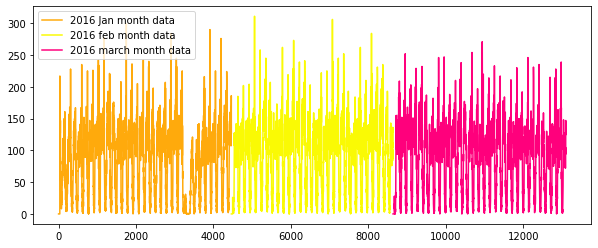

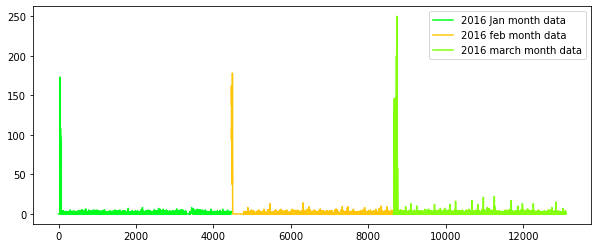

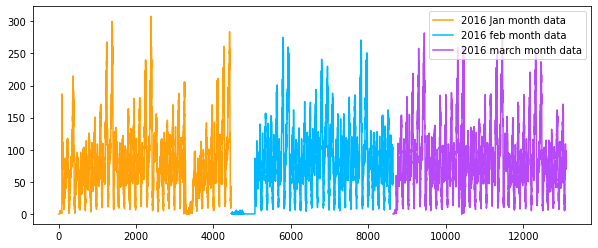

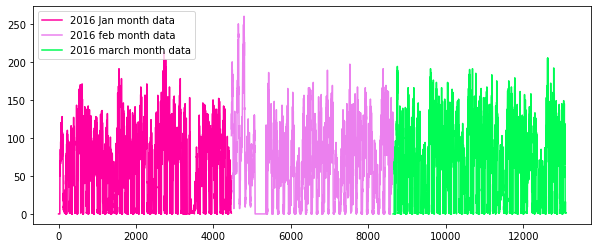

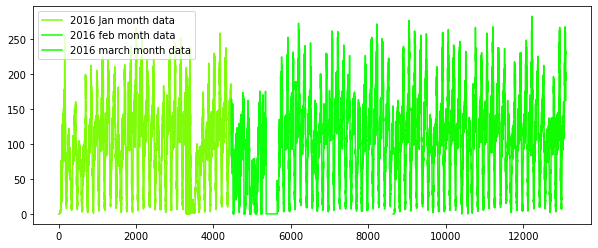

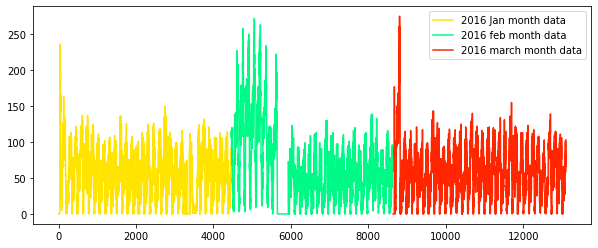

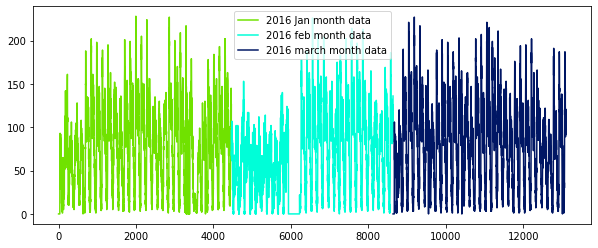

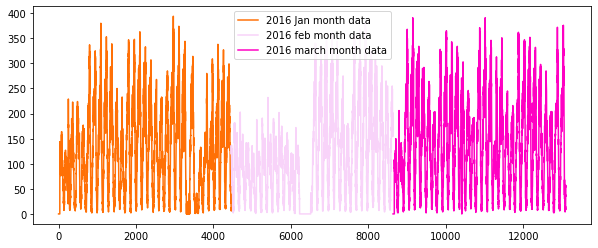

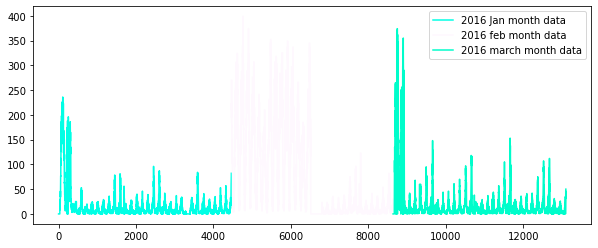

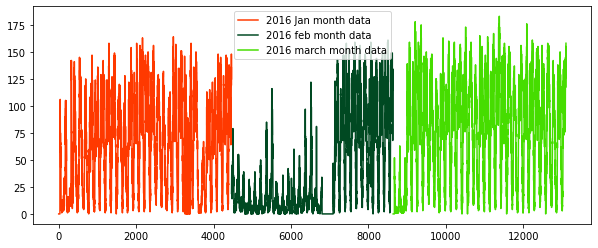

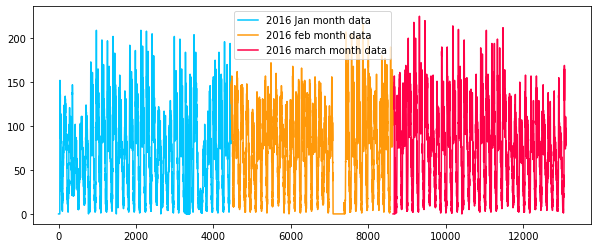

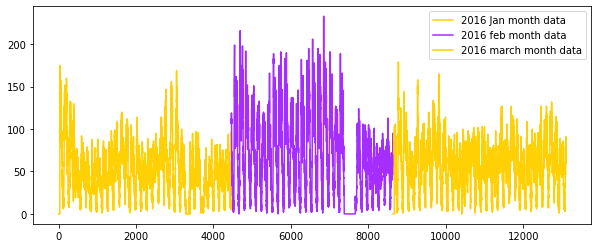

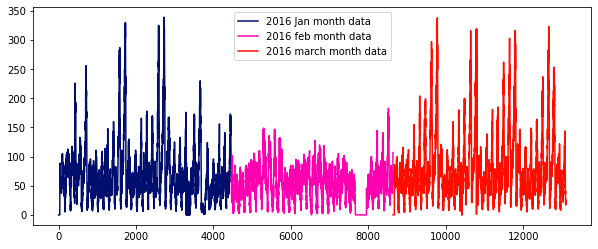

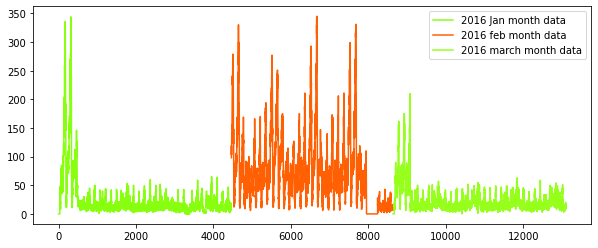

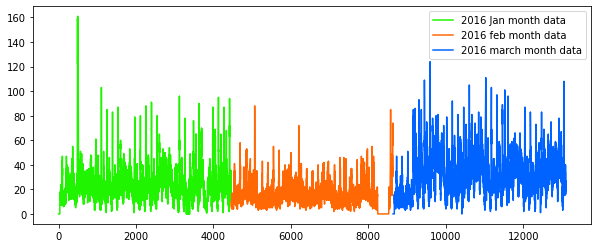

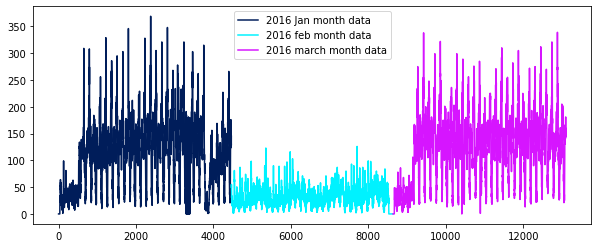

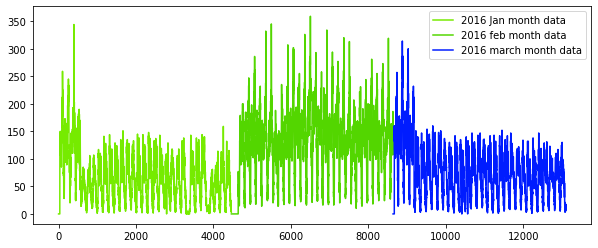

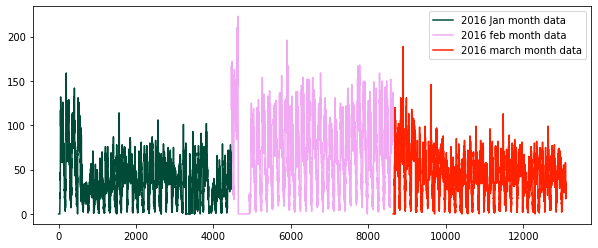

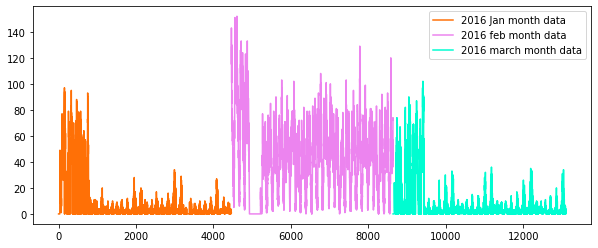

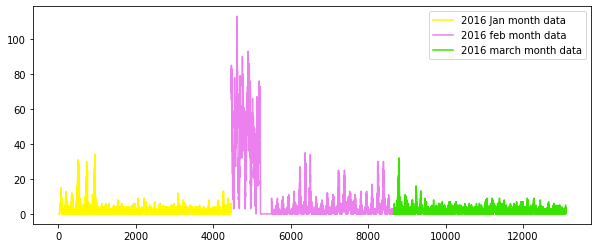

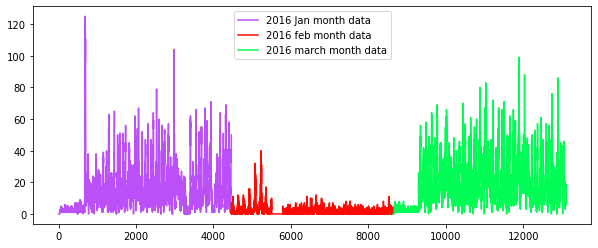

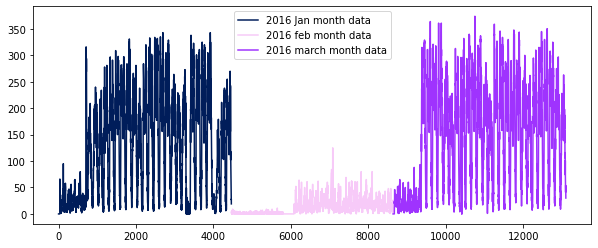

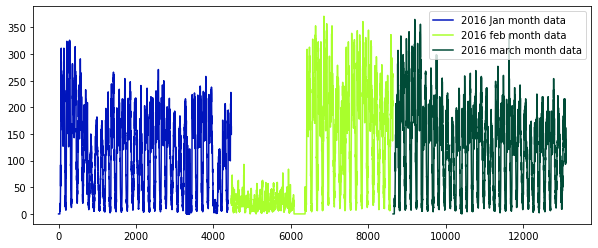

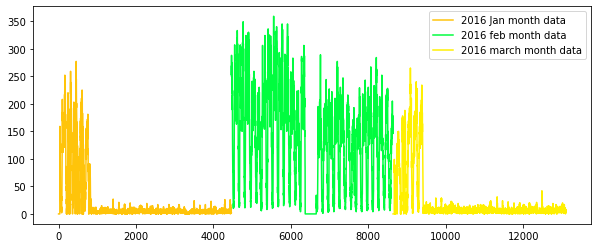

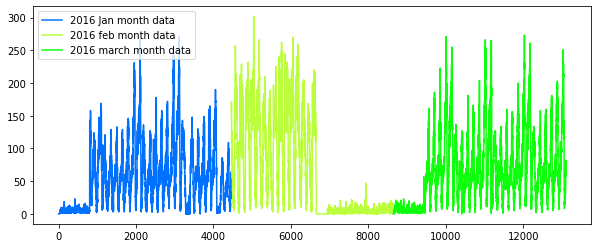

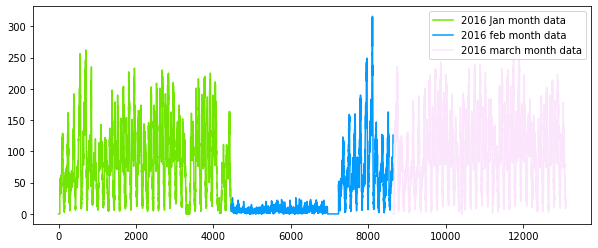

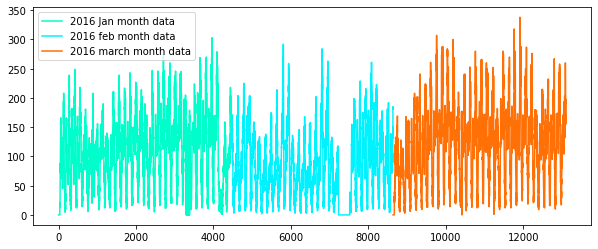

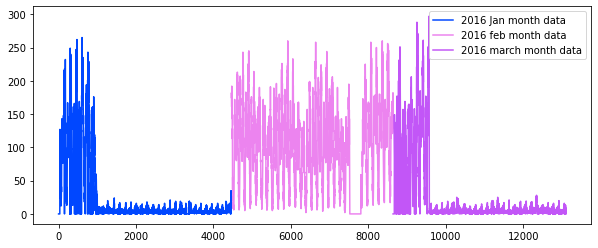

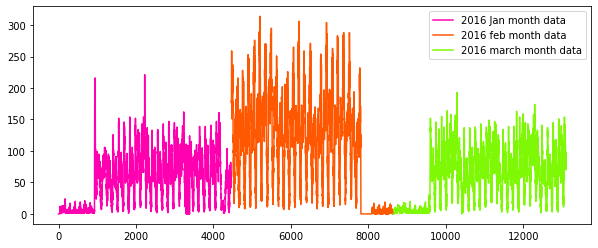

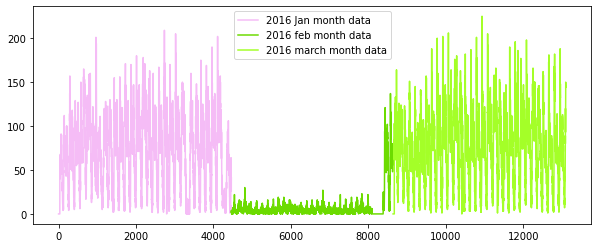

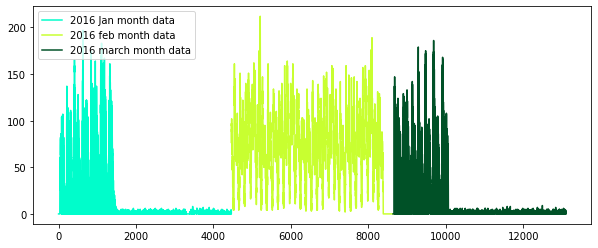

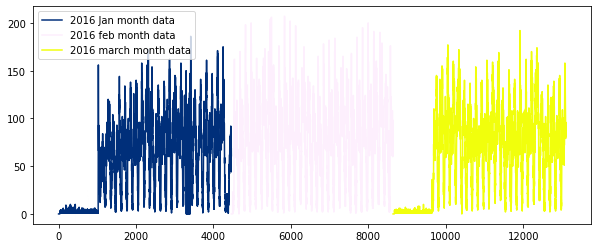

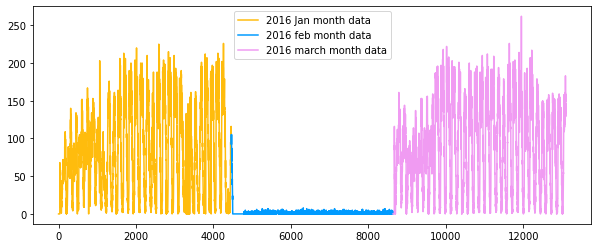

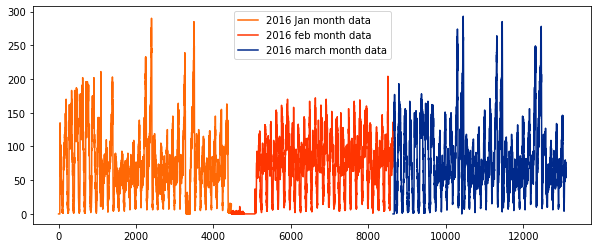

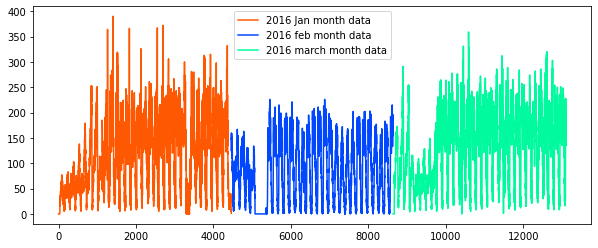

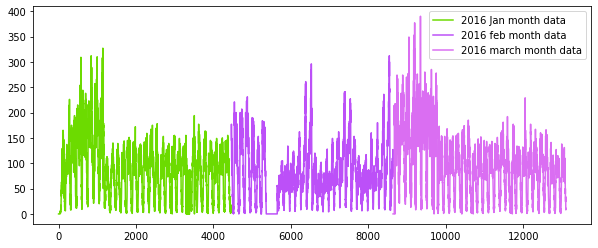

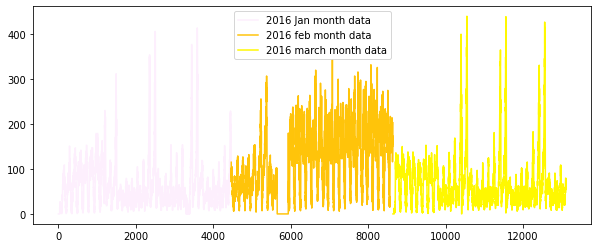

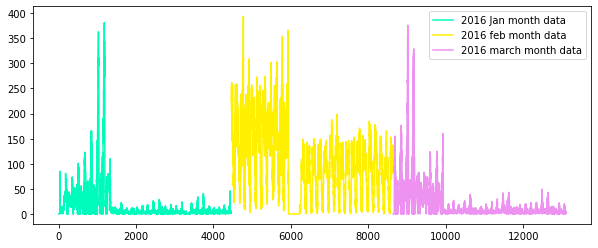

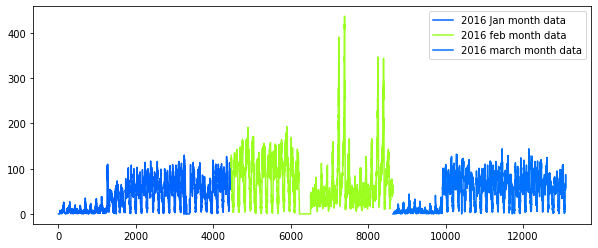

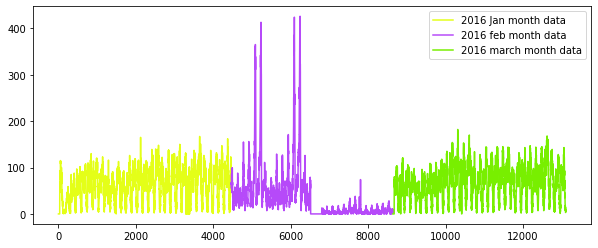

In [65]:
def uniqueish_color():
    """There're better ways to generate unique colors, but this isn't awful."""
    return plt.cm.gist_ncar(np.random.random())
first_x = list(range(0,4464))
second_x = list(range(4464,8640))
third_x = list(range(8640,13104))
for i in range(40):
    plt.figure(figsize=(10,4))
    plt.plot(first_x,regions_cum[i][:4464], color=uniqueish_color(), label='2016 Jan month data')
    plt.plot(second_x,regions_cum[i][4464:8640], color=uniqueish_color(), label='2016 feb month data')
    plt.plot(third_x,regions_cum[i][8640:], color=uniqueish_color(), label='2016 march month data')
    plt.legend()
    plt.show()

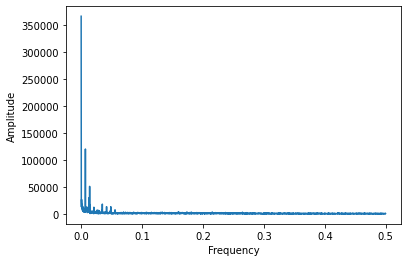

In [66]:
# getting peaks: https://blog.ytotech.com/2015/11/01/findpeaks-in-python/
# read more about fft function : https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fft.html
Y    = np.fft.fft(np.array(jan_2016_smooth)[0:4460])
# read more about the fftfreq: https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fftfreq.html  
freq = np.fft.fftfreq(4460, 1)
n = len(freq)
plt.figure()
plt.plot( freq[:int(n/2)], np.abs(Y)[:int(n/2)] )
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.show()

In [67]:
#Preparing the Dataframe only with x(i) values as jan-2015 data and y(i) values as jan-2016
ratios_jan = pd.DataFrame()
ratios_jan['Given']=jan_2015_smooth
ratios_jan['Prediction']=jan_2016_smooth
ratios_jan['Ratios']=ratios_jan['Prediction']*1.0/ratios_jan['Given']*1.0

## Modelling: Baseline Models

Now we get into modelling in order to forecast the pickup densities for the months of Jan, Feb and March of 2016 for which we are using multiple models with two variations 
1. Using Ratios of the 2016 data to the 2015 data i.e $\begin{align} R_{t} = P^{2016}_{t} / P^{2015}_{t} \end{align}$
2. Using Previous known values of the 2016 data itself to predict the future values

### Simple Moving Averages
The First Model used is the Moving Averages Model which uses the previous n values in order to predict the next value <br> 

Using Ratio Values - $\begin{align}R_{t} = ( R_{t-1} + R_{t-2} + R_{t-3} .... R_{t-n} )/n \end{align}$

In [68]:
def MA_R_Predictions(ratios,month):
    predicted_ratio=(ratios['Ratios'].values)[0]
    error=[]
    predicted_values=[]
    window_size=3
    predicted_ratio_values=[]
    for i in range(0,4464*40):
        if i%4464==0:
            predicted_ratio_values.append(0)
            predicted_values.append(0)
            error.append(0)
            continue
        predicted_ratio_values.append(predicted_ratio)
        predicted_values.append(int(((ratios['Given'].values)[i])*predicted_ratio))
        error.append(abs((math.pow(int(((ratios['Given'].values)[i])*predicted_ratio)-(ratios['Prediction'].values)[i],1))))
        if i+1>=window_size:
            predicted_ratio=sum((ratios['Ratios'].values)[(i+1)-window_size:(i+1)])/window_size
        else:
            predicted_ratio=sum((ratios['Ratios'].values)[0:(i+1)])/(i+1)
            
    
    ratios['MA_R_Predicted'] = predicted_values
    ratios['MA_R_Error'] = error
    mape_err = (sum(error)/len(error))/(sum(ratios['Prediction'].values)/len(ratios['Prediction'].values))
    mse_err = sum([e**2 for e in error])/len(error)
    return ratios,mape_err,mse_err

For the above the Hyperparameter is the window-size (n) which is tuned manually and it is found that the window-size of 3 is optimal for getting the best results using Moving Averages using previous Ratio values therefore we get $\begin{align}R_{t} = ( R_{t-1} + R_{t-2} + R_{t-3})/3 \end{align}$

Next we use the Moving averages of the 2016  values itself to predict the future value using $\begin{align}P_{t} = ( P_{t-1} + P_{t-2} + P_{t-3} .... P_{t-n} )/n \end{align}$

In [69]:
def MA_P_Predictions(ratios,month):
    predicted_value=(ratios['Prediction'].values)[0]
    error=[]
    predicted_values=[]
    window_size=1
    predicted_ratio_values=[]
    for i in range(0,4464*40):
        predicted_values.append(predicted_value)
        error.append(abs((math.pow(predicted_value-(ratios['Prediction'].values)[i],1))))
        if i+1>=window_size:
            predicted_value=int(sum((ratios['Prediction'].values)[(i+1)-window_size:(i+1)])/window_size)
        else:
            predicted_value=int(sum((ratios['Prediction'].values)[0:(i+1)])/(i+1))
            
    ratios['MA_P_Predicted'] = predicted_values
    ratios['MA_P_Error'] = error
    mape_err = (sum(error)/len(error))/(sum(ratios['Prediction'].values)/len(ratios['Prediction'].values))
    mse_err = sum([e**2 for e in error])/len(error)
    return ratios,mape_err,mse_err

For the above the Hyperparameter is the window-size (n) which is tuned manually and it is found that the window-size of 1 is optimal for getting the best results using Moving Averages using previous 2016 values therefore we get $\begin{align}P_{t} = P_{t-1} \end{align}$

### Weighted Moving Averages
The Moving Avergaes Model used gave equal importance to all the values in the window used, but we know intuitively that the future is more likely to be similar to the latest values and less similar to the older values. Weighted Averages converts this analogy into a mathematical relationship giving the highest weight while computing the averages to the latest previous value and decreasing weights to the subsequent older ones<br>

Weighted Moving Averages using Ratio Values - $\begin{align}R_{t} = ( N*R_{t-1} + (N-1)*R_{t-2} + (N-2)*R_{t-3} .... 1*R_{t-n} )/(N*(N+1)/2) \end{align}$

In [70]:
def WA_R_Predictions(ratios,month):
    predicted_ratio=(ratios['Ratios'].values)[0]
    alpha=0.5
    error=[]
    predicted_values=[]
    window_size=5
    predicted_ratio_values=[]
    for i in range(0,4464*40):
        if i%4464==0:
            predicted_ratio_values.append(0)
            predicted_values.append(0)
            error.append(0)
            continue
        predicted_ratio_values.append(predicted_ratio)
        predicted_values.append(int(((ratios['Given'].values)[i])*predicted_ratio))
        error.append(abs((math.pow(int(((ratios['Given'].values)[i])*predicted_ratio)-(ratios['Prediction'].values)[i],1))))
        if i+1>=window_size:
            sum_values=0
            sum_of_coeff=0
            for j in range(window_size,0,-1):
                sum_values += j*(ratios['Ratios'].values)[i-window_size+j]
                sum_of_coeff+=j
            predicted_ratio=sum_values/sum_of_coeff
        else:
            sum_values=0
            sum_of_coeff=0
            for j in range(i+1,0,-1):
                sum_values += j*(ratios['Ratios'].values)[j-1]
                sum_of_coeff+=j
            predicted_ratio=sum_values/sum_of_coeff
            
    ratios['WA_R_Predicted'] = predicted_values
    ratios['WA_R_Error'] = error
    mape_err = (sum(error)/len(error))/(sum(ratios['Prediction'].values)/len(ratios['Prediction'].values))
    mse_err = sum([e**2 for e in error])/len(error)
    return ratios,mape_err,mse_err

For the above the Hyperparameter is the window-size (n) which is tuned manually and it is found that the window-size of 5 is optimal for getting the best results using Weighted Moving Averages using previous Ratio values therefore we get $\begin{align} R_{t} = ( 5*R_{t-1} + 4*R_{t-2} + 3*R_{t-3} + 2*R_{t-4} + R_{t-5} )/15 \end{align}$

Weighted Moving Averages using Previous 2016 Values - $\begin{align}P_{t} = ( N*P_{t-1} + (N-1)*P_{t-2} + (N-2)*P_{t-3} .... 1*P_{t-n} )/(N*(N+1)/2) \end{align}$

In [71]:
def WA_P_Predictions(ratios,month):
    predicted_value=(ratios['Prediction'].values)[0]
    error=[]
    predicted_values=[]
    window_size=2
    for i in range(0,4464*40):
        predicted_values.append(predicted_value)
        error.append(abs((math.pow(predicted_value-(ratios['Prediction'].values)[i],1))))
        if i+1>=window_size:
            sum_values=0
            sum_of_coeff=0
            for j in range(window_size,0,-1):
                sum_values += j*(ratios['Prediction'].values)[i-window_size+j]
                sum_of_coeff+=j
            predicted_value=int(sum_values/sum_of_coeff)

        else:
            sum_values=0
            sum_of_coeff=0
            for j in range(i+1,0,-1):
                sum_values += j*(ratios['Prediction'].values)[j-1]
                sum_of_coeff+=j
            predicted_value=int(sum_values/sum_of_coeff)
    
    ratios['WA_P_Predicted'] = predicted_values
    ratios['WA_P_Error'] = error
    mape_err = (sum(error)/len(error))/(sum(ratios['Prediction'].values)/len(ratios['Prediction'].values))
    mse_err = sum([e**2 for e in error])/len(error)
    return ratios,mape_err,mse_err

For the above the Hyperparameter is the window-size (n) which is tuned manually and it is found that the window-size of 2 is optimal for getting the best results using Weighted Moving Averages using previous 2016 values therefore we get $\begin{align} P_{t} = ( 2*P_{t-1} + P_{t-2} )/3 \end{align}$

### Exponential  Weighted Moving Averages
 https://en.wikipedia.org/wiki/Moving_average#Exponential_moving_average
Through weighted averaged we have satisfied the analogy of giving higher weights to the latest value and decreasing weights to the subsequent ones but we still do not know which is the correct weighting scheme as there are infinetly many possibilities in which we can assign weights in a non-increasing order and tune the the hyperparameter window-size. To simplify this process we use Exponential Moving Averages which is a more logical way towards assigning weights and at the same time also using an optimal window-size.

In exponential moving averages we use a single hyperparameter alpha $\begin{align}(\alpha)\end{align}$ which is a value between 0 & 1 and based on the value of the hyperparameter alpha the weights and the window sizes are configured.<br>
For eg. If $\begin{align}\alpha=0.9\end{align}$ then the number of days on which the value of the current iteration is based is~$\begin{align}1/(1-\alpha)=10\end{align}$ i.e. we consider values 10 days prior before we predict the value for the current iteration. Also the weights are assigned using $\begin{align}2/(N+1)=0.18\end{align}$ ,where N = number of prior values being considered, hence from this it is implied that the first or latest value is assigned a weight of 0.18 which keeps exponentially decreasing for the subsequent values.

$\begin{align}R^{'}_{t} = \alpha*R_{t-1} + (1-\alpha)*R^{'}_{t-1}  \end{align}$

In [72]:
def EA_R1_Predictions(ratios,month):
    predicted_ratio=(ratios['Ratios'].values)[0]
    alpha=0.6
    error=[]
    predicted_values=[]
    predicted_ratio_values=[]
    for i in range(0,4464*40):
        if i%4464==0:
            predicted_ratio_values.append(0)
            predicted_values.append(0)
            error.append(0)
            continue
        predicted_ratio_values.append(predicted_ratio)
        predicted_values.append(int(((ratios['Given'].values)[i])*predicted_ratio))
        error.append(abs((math.pow(int(((ratios['Given'].values)[i])*predicted_ratio)-(ratios['Prediction'].values)[i],1))))
        predicted_ratio = (alpha*predicted_ratio) + (1-alpha)*((ratios['Ratios'].values)[i])
    
    ratios['EA_R1_Predicted'] = predicted_values
    ratios['EA_R1_Error'] = error
    mape_err = (sum(error)/len(error))/(sum(ratios['Prediction'].values)/len(ratios['Prediction'].values))
    mse_err = sum([e**2 for e in error])/len(error)
    return ratios,mape_err,mse_err

$\begin{align}P^{'}_{t} = \alpha*P_{t-1} + (1-\alpha)*P^{'}_{t-1}  \end{align}$

In [73]:
def EA_P1_Predictions(ratios,month):
    predicted_value= (ratios['Prediction'].values)[0]
    alpha=0.3
    error=[]
    predicted_values=[]
    for i in range(0,4464*40):
        if i%4464==0:
            predicted_values.append(0)
            error.append(0)
            continue
        predicted_values.append(predicted_value)
        error.append(abs((math.pow(predicted_value-(ratios['Prediction'].values)[i],1))))
        predicted_value =int((alpha*predicted_value) + (1-alpha)*((ratios['Prediction'].values)[i]))
    
    ratios['EA_P1_Predicted'] = predicted_values
    ratios['EA_P1_Error'] = error
    mape_err = (sum(error)/len(error))/(sum(ratios['Prediction'].values)/len(ratios['Prediction'].values))
    mse_err = sum([e**2 for e in error])/len(error)
    return ratios,mape_err,mse_err

In [74]:
mean_err=[0]*10
median_err=[0]*10
ratios_jan,mean_err[0],median_err[0]=MA_R_Predictions(ratios_jan,'jan')
ratios_jan,mean_err[1],median_err[1]=MA_P_Predictions(ratios_jan,'jan')
ratios_jan,mean_err[2],median_err[2]=WA_R_Predictions(ratios_jan,'jan')
ratios_jan,mean_err[3],median_err[3]=WA_P_Predictions(ratios_jan,'jan')
ratios_jan,mean_err[4],median_err[4]=EA_R1_Predictions(ratios_jan,'jan')
ratios_jan,mean_err[5],median_err[5]=EA_P1_Predictions(ratios_jan,'jan')

## Comparison between baseline models
We have chosen our error metric for comparison between models as <b>MAPE (Mean Absolute Percentage Error)</b> so that we can know that on an average how good is our model with predictions and <b>MSE (Mean Squared Error)</b> is also used so that we have a clearer understanding as to how well our forecasting model performs with outliers so that we make sure that there is not much of a error margin between our prediction and the actual value

In [75]:
print ("Error Metric Matrix (Forecasting Methods) - MAPE & MSE")
print ("--------------------------------------------------------------------------------------------------------")
print ("Moving Averages (Ratios) -                             MAPE: ",mean_err[0],"      MSE: ",median_err[0])
print ("Moving Averages (2016 Values) -                        MAPE: ",mean_err[1],"       MSE: ",median_err[1])
print ("--------------------------------------------------------------------------------------------------------")
print ("Weighted Moving Averages (Ratios) -                    MAPE: ",mean_err[2],"      MSE: ",median_err[2])
print ("Weighted Moving Averages (2016 Values) -               MAPE: ",mean_err[3],"      MSE: ",median_err[3])
print ("--------------------------------------------------------------------------------------------------------")
print ("Exponential Moving Averages (Ratios) -              MAPE: ",mean_err[4],"      MSE: ",median_err[4])
print ("Exponential Moving Averages (2016 Values) -         MAPE: ",mean_err[5],"      MSE: ",median_err[5])

Error Metric Matrix (Forecasting Methods) - MAPE & MSE
--------------------------------------------------------------------------------------------------------
Moving Averages (Ratios) -                             MAPE:  0.22785156353133512       MSE:  1196.2953853046595
Moving Averages (2016 Values) -                        MAPE:  0.15583458712025738        MSE:  254.66309363799283
--------------------------------------------------------------------------------------------------------
Weighted Moving Averages (Ratios) -                    MAPE:  0.22706529144871415       MSE:  1053.083529345878
Weighted Moving Averages (2016 Values) -               MAPE:  0.1479482182992932       MSE:  224.81054547491038
--------------------------------------------------------------------------------------------------------
Exponential Moving Averages (Ratios) -              MAPE:  0.2275474636148534       MSE:  1019.3071012544802
Exponential Moving Averages (2016 Values) -         MAPE:  0.147538129

<b>Plese Note:-</b> The above comparisons are made using Jan 2015 and Jan 2016 only

From the above matrix it is inferred that the best forecasting model for our prediction would be:-
$\begin{align}P^{'}_{t} = \alpha*P_{t-1} + (1-\alpha)*P^{'}_{t-1}  \end{align}$ i.e Exponential Moving Averages using 2016 Values

## Regression Models

### Train-Test Split
Before we start predictions using the tree based regression models we take 3 months of 2016 pickup data and split it such that for every region we have 70% data in train and 30% in test, ordered date-wise for every region

In [76]:
# Preparing data to be split into train and test, The below prepares data in cumulative form which will be later split into test and train
# number of 10min indices for jan 2015= 24*31*60/10 = 4464
# number of 10min indices for jan 2016 = 24*31*60/10 = 4464
# number of 10min indices for feb 2016 = 24*29*60/10 = 4176
# number of 10min indices for march 2016 = 24*31*60/10 = 4464
# regions_cum: it will contain 40 lists, each list will contain 4464+4176+4464 values which represents the number of pickups 
# that are happened for three months in 2016 data

# print(len(regions_cum))
# 40
# print(len(regions_cum[0]))
# 12960

# we take number of pickups that are happened in last 5 10min intravels
number_of_time_stamps = 5

# output varaible
# it is list of lists
# it will contain number of pickups 13099 for each cluster
output = []


# tsne_lat will contain 13104-5=13099 times lattitude of cluster center for every cluster
# Ex: [[cent_lat 13099times],[cent_lat 13099times], [cent_lat 13099times].... 40 lists]
# it is list of lists
tsne_lat = []


# tsne_lon will contain 13104-5=13099 times logitude of cluster center for every cluster
# Ex: [[cent_long 13099times],[cent_long 13099times], [cent_long 13099times].... 40 lists]
# it is list of lists
tsne_lon = []

# we will code each day 
# sunday = 0, monday=1, tue = 2, wed=3, thur=4, fri=5,sat=6
# for every cluster we will be adding 13099 values, each value represent to which day of the week that pickup bin belongs to
# it is list of lists
tsne_weekday = []

# its an numbpy array, of shape (523960, 5)
# each row corresponds to an entry in out data
# for the first row we will have [f0,f1,f2,f3,f4] fi=number of pickups happened in i+1th 10min intravel(bin)
# the second row will have [f1,f2,f3,f4,f5]
# the third row will have [f2,f3,f4,f5,f6]
# and so on...
tsne_feature = []

#Adding one more list to store cluster number
tsne_cluster = []

tsne_feature = [0]*number_of_time_stamps
for i in range(0,40):
    tsne_lat.append([kmeans.cluster_centers_[i][0]]*13099)
    tsne_lon.append([kmeans.cluster_centers_[i][1]]*13099)
    tsne_cluster.append([i]*13099)
    # jan 1st 2016 is FRIDAY, so we start our day from 5: "(int(k/144))%7+4"
    # our prediction start from 5th 10min intravel since we need to have number of pickups that are happened in last 5 pickup bins
    tsne_weekday.append([int(((int(k/144))%7+5)%7) for k in range(5,4464+4176+4464)])
    # regions_cum is a list of lists [[x1,x2,x3..x13104], [x1,x2,x3..x13104], [x1,x2,x3..x13104], [x1,x2,x3..x13104], [x1,x2,x3..x13104], .. 40 lsits]
    tsne_feature = np.vstack((tsne_feature, [regions_cum[i][r:r+number_of_time_stamps] for r in range(0,len(regions_cum[i])-number_of_time_stamps)]))
    output.append(regions_cum[i][5:])
tsne_feature = tsne_feature[1:]

In [77]:
len(tsne_lat[0])*len(tsne_lat) == tsne_feature.shape[0] == len(tsne_weekday)*len(tsne_weekday[0]) == 40*13099 == len(output)*len(output[0])

True

In [78]:
# Getting the predictions of exponential moving averages to be used as a feature in cumulative form

# upto now we computed 8 features for every data point that starts from 50th min of the day
# 1. cluster center lattitude
# 2. cluster center longitude
# 3. day of the week 
# 4. f_t_1: number of pickups that are happened previous t-1th 10min intravel
# 5. f_t_2: number of pickups that are happened previous t-2th 10min intravel
# 6. f_t_3: number of pickups that are happened previous t-3th 10min intravel
# 7. f_t_4: number of pickups that are happened previous t-4th 10min intravel
# 8. f_t_5: number of pickups that are happened previous t-5th 10min intravel

# from the baseline models we said the exponential weighted moving avarage gives us the best error
# we will try to add the same exponential weighted moving avarage at t as a feature to our data
# exponential weighted moving avarage => p'(t) = alpha*p'(t-1) + (1-alpha)*P(t-1) 
alpha=0.3

# it is a temporary array that store exponential weighted moving avarage for each 10min intravel, 
# for each cluster it will get reset
# for every cluster it contains 13104 values
predicted_values=[]

# it is similar like tsne_lat
# it is list of lists
# predict_list is a list of lists [[x5,x6,x7..x13104], [x5,x6,x7..x13104], [x5,x6,x7..x13104], [x5,x6,x7..x13104], [x5,x6,x7..x13104], .. 40 lsits]
predict_list = []
tsne_flat_exp_avg = []
for r in range(0,40):
    for i in range(0,13104):
        if i==0:
            predicted_value= regions_cum[r][0]
            predicted_values.append(0)
            continue
        predicted_values.append(predicted_value)
        predicted_value =int((alpha*predicted_value) + (1-alpha)*(regions_cum[r][i]))
    predict_list.append(predicted_values[5:])
    predicted_values=[]

In [79]:
tsne_feature

array([[ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0],
       ...,
       [11,  7, 15,  9,  3],
       [ 7, 15,  9,  3,  7],
       [15,  9,  3,  7,  6]])

In [80]:
# train, test split : 70% 30% split
# Before we start predictions using the tree based regression models we take 3 months of 2016 pickup data 
# and split it such that for every region we have 70% data in train and 30% in test,
# ordered date-wise for every region
print("size of train data :", int(13099*0.7))
print("size of test data :", int(13099*0.3))

size of train data : 9169
size of test data : 3929


In [81]:
# extracting first 9169 timestamp values i.e 70% of 13099 (total timestamps) for our training data
train_features =  [tsne_feature[i*13099:(13099*i+9169)] for i in range(0,40)]
# temp = [0]*(12955 - 9068)
test_features = [tsne_feature[(13099*(i))+9169:13099*(i+1)] for i in range(0,40)]

In [82]:
print("Number of data clusters",len(train_features), "Number of data points in trian data", len(train_features[0]), "Each data point contains", len(train_features[0][0]),"features")
print("Number of data clusters",len(train_features), "Number of data points in test data", len(test_features[0]), "Each data point contains", len(test_features[0][0]),"features")

Number of data clusters 40 Number of data points in trian data 9169 Each data point contains 5 features
Number of data clusters 40 Number of data points in test data 3930 Each data point contains 5 features


In [83]:
# extracting first 9169 timestamp values i.e 70% of 13099 (total timestamps) for our training data
tsne_train_flat_lat = [i[:9169] for i in tsne_lat]
tsne_train_flat_lon = [i[:9169] for i in tsne_lon]
tsne_train_flat_weekday = [i[:9169] for i in tsne_weekday]
tsne_train_flat_output = [i[:9169] for i in output]
tsne_train_flat_exp_avg = [i[:9169] for i in predict_list]
tsne_train_flat_cluster = [i[:9169] for i in tsne_cluster]

In [84]:
# extracting the rest of the timestamp values i.e 30% of 12956 (total timestamps) for our test data
tsne_test_flat_lat = [i[9169:] for i in tsne_lat]
tsne_test_flat_lon = [i[9169:] for i in tsne_lon]
tsne_test_flat_weekday = [i[9169:] for i in tsne_weekday]
tsne_test_flat_output = [i[9169:] for i in output]
tsne_test_flat_exp_avg = [i[9169:] for i in predict_list]
tsne_test_flat_cluster = [i[9169:] for i in tsne_cluster]

In [85]:
# the above contains values in the form of list of lists (i.e. list of values of each region), here we make all of them in one list
train_new_features = []
for i in range(0,40):
    train_new_features.extend(train_features[i])
test_new_features = []
for i in range(0,40):
    test_new_features.extend(test_features[i])

In [86]:
# converting lists of lists into sinle list i.e flatten
# a  = [[1,2,3,4],[4,6,7,8]]
# print(sum(a,[]))
# [1, 2, 3, 4, 4, 6, 7, 8]

tsne_train_lat = sum(tsne_train_flat_lat, [])
tsne_train_lon = sum(tsne_train_flat_lon, [])
tsne_train_weekday = sum(tsne_train_flat_weekday, [])
tsne_train_output = sum(tsne_train_flat_output, [])
tsne_train_exp_avg = sum(tsne_train_flat_exp_avg,[])
tsne_train_cluster = sum(tsne_train_flat_cluster, [])

In [87]:
# converting lists of lists into sinle list i.e flatten
# a  = [[1,2,3,4],[4,6,7,8]]
# print(sum(a,[]))
# [1, 2, 3, 4, 4, 6, 7, 8]

tsne_test_lat = sum(tsne_test_flat_lat, [])
tsne_test_lon = sum(tsne_test_flat_lon, [])
tsne_test_weekday = sum(tsne_test_flat_weekday, [])
tsne_test_output = sum(tsne_test_flat_output, [])
tsne_test_exp_avg = sum(tsne_test_flat_exp_avg,[])
tsne_test_cluster = sum(tsne_test_flat_cluster,[])

In [88]:
# Preparing the data frame for our train data
columns = ['ft_5','ft_4','ft_3','ft_2','ft_1']
df_train = pd.DataFrame(data=train_new_features, columns=columns) 
df_train['lat'] = tsne_train_lat
df_train['lon'] = tsne_train_lon
df_train['weekday'] = tsne_train_weekday
df_train['exp_avg'] = tsne_train_exp_avg
df_train['cluster'] = tsne_train_cluster
print(df_train.shape)

(366760, 10)


In [89]:
# Preparing the data frame for our train data
df_test = pd.DataFrame(data=test_new_features, columns=columns) 
df_test['lat'] = tsne_test_lat
df_test['lon'] = tsne_test_lon
df_test['weekday'] = tsne_test_weekday
df_test['exp_avg'] = tsne_test_exp_avg
df_test['cluster'] = tsne_test_cluster
print(df_test.shape)

(157200, 10)


In [90]:
df_train.head()

ft_5  ft_4  ft_3  ft_2  ...        lon  weekday  exp_avg  cluster
0     0     0     0     0  ... -73.982119        5        0        0
1     0     0     0     0  ... -73.982119        5        0        0
2     0     0     0     0  ... -73.982119        5        0        0
3     0     0     0     0  ... -73.982119        5        0        0
4     0     0     0     0  ... -73.982119        5        0        0

[5 rows x 10 columns]

### Using Linear Regression

In [91]:
# find more about LinearRegression function here http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
# -------------------------
# default paramters
# sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)

# some of methods of LinearRegression()
# fit(X, y[, sample_weight])	Fit linear model.
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict using the linear model
# score(X, y[, sample_weight])	Returns the coefficient of determination R^2 of the prediction.
# set_params(**params)	Set the parameters of this estimator.
# -----------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1-2-copy-8/
# -----------------------

from sklearn.linear_model import LinearRegression
lr_reg=LinearRegression().fit(df_train, tsne_train_output)

y_pred = lr_reg.predict(df_test)
lr_test_predictions = [round(value) for value in y_pred]
y_pred = lr_reg.predict(df_train)
lr_train_predictions = [round(value) for value in y_pred]

### Using Random Forest Regressor

In [92]:
# Training a hyper-parameter tuned random forest regressor on our train data
# find more about LinearRegression function here http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
# -------------------------
# default paramters
# sklearn.ensemble.RandomForestRegressor(n_estimators=10, criterion=’mse’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False)

# some of methods of RandomForestRegressor()
# apply(X)	Apply trees in the forest to X, return leaf indices.
# decision_path(X)	Return the decision path in the forest
# fit(X, y[, sample_weight])	Build a forest of trees from the training set (X, y).
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict regression target for X.
# score(X, y[, sample_weight])	Returns the coefficient of determination R^2 of the prediction.
# -----------------------
# video link1: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/regression-using-decision-trees-2/
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

regr1 = RandomForestRegressor(max_features='sqrt',min_samples_leaf=4,min_samples_split=3,n_estimators=40, n_jobs=-1)
regr1.fit(df_train, tsne_train_output)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=3, min_weight_fraction_leaf=0.0,
                      n_estimators=40, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [93]:
# Predicting on test data using our trained random forest model 

# the models regr1 is already hyper parameter tuned
# the parameters that we got above are found using grid search

y_pred = regr1.predict(df_test)
rndf_test_predictions = [round(value) for value in y_pred]
y_pred = regr1.predict(df_train)
rndf_train_predictions = [round(value) for value in y_pred]

In [94]:
#feature importances based on analysis using random forest
print (df_train.columns)
print (regr1.feature_importances_)

Index(['ft_5', 'ft_4', 'ft_3', 'ft_2', 'ft_1', 'lat', 'lon', 'weekday',
       'exp_avg', 'cluster'],
      dtype='object')
[0.05975184 0.06170537 0.12695138 0.17976577 0.27394356 0.00262893
 0.00295823 0.00182611 0.2880145  0.00245431]


### Using XgBoost Regressor

In [95]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBRegressor function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#module-xgboost.sklearn
# -------------------------
# default paramters
# xgboost.XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, objective='reg:linear', 
# booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, 
# colsample_bylevel=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, 
# missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link1: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/regression-using-decision-trees-2/
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

x_model = xgb.XGBRegressor(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=3,
 gamma=0,
 subsample=0.8,
 reg_alpha=200, reg_lambda=200,
 colsample_bytree=0.8,nthread=4)
x_model.fit(df_train, tsne_train_output)

[02:39:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=3, missing=None, n_estimators=1000,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=200, reg_lambda=200, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.8, verbosity=1)

In [96]:
#predicting with our trained Xg-Boost regressor
# the models x_model is already hyper parameter tuned
# the parameters that we got above are found using grid search

y_pred = x_model.predict(df_test)
xgb_test_predictions = [round(value) for value in y_pred]
y_pred = x_model.predict(df_train)
xgb_train_predictions = [round(value) for value in y_pred]

In [97]:
#feature importances
#Ref: To solve NoneType not callable error: https://datascience.stackexchange.com/a/40812

x_model.get_booster().get_score(importance_type='weight')

{'cluster': 519,
 'exp_avg': 796,
 'ft_1': 1193,
 'ft_2': 978,
 'ft_3': 775,
 'ft_4': 770,
 'ft_5': 992,
 'lat': 343,
 'lon': 395,
 'weekday': 145}

### Calculating the error metric values for various models

In [98]:
train_mape=[]
test_mape=[]

train_mape.append((mean_absolute_error(tsne_train_output,df_train['ft_1'].values))/(sum(tsne_train_output)/len(tsne_train_output)))
train_mape.append((mean_absolute_error(tsne_train_output,df_train['exp_avg'].values))/(sum(tsne_train_output)/len(tsne_train_output)))
train_mape.append((mean_absolute_error(tsne_train_output,rndf_train_predictions))/(sum(tsne_train_output)/len(tsne_train_output)))
train_mape.append((mean_absolute_error(tsne_train_output, xgb_train_predictions))/(sum(tsne_train_output)/len(tsne_train_output)))
train_mape.append((mean_absolute_error(tsne_train_output, lr_train_predictions))/(sum(tsne_train_output)/len(tsne_train_output)))

test_mape.append((mean_absolute_error(tsne_test_output, df_test['ft_1'].values))/(sum(tsne_test_output)/len(tsne_test_output)))
test_mape.append((mean_absolute_error(tsne_test_output, df_test['exp_avg'].values))/(sum(tsne_test_output)/len(tsne_test_output)))
test_mape.append((mean_absolute_error(tsne_test_output, rndf_test_predictions))/(sum(tsne_test_output)/len(tsne_test_output)))
test_mape.append((mean_absolute_error(tsne_test_output, xgb_test_predictions))/(sum(tsne_test_output)/len(tsne_test_output)))
test_mape.append((mean_absolute_error(tsne_test_output, lr_test_predictions))/(sum(tsne_test_output)/len(tsne_test_output)))

In [99]:
print ("Error Metric Matrix (Tree Based Regression Methods) -  MAPE")
print ("--------------------------------------------------------------------------------------------------------")
print ("Baseline Model -                             Train: ",train_mape[0],"      Test: ",test_mape[0])
print ("Exponential Averages Forecasting -           Train: ",train_mape[1],"      Test: ",test_mape[1])
print ("Linear Regression -                         Train: ",train_mape[3],"      Test: ",test_mape[3])
print ("Random Forest Regression -                   Train: ",train_mape[2],"     Test: ",test_mape[2])

Error Metric Matrix (Tree Based Regression Methods) -  MAPE
--------------------------------------------------------------------------------------------------------
Baseline Model -                             Train:  0.14870666996426116       Test:  0.14225522601041551
Exponential Averages Forecasting -           Train:  0.14121603560900353       Test:  0.13490049942819257
Linear Regression -                         Train:  0.1383660592412167       Test:  0.13260111467077557
Random Forest Regression -                   Train:  0.09900264489955649      Test:  0.13279464511331363


### Error Metric Matrix

In [100]:
print ("Error Metric Matrix (Tree Based Regression Methods) -  MAPE")
print ("--------------------------------------------------------------------------------------------------------")
print ("Baseline Model -                             Train: ",train_mape[0],"      Test: ",test_mape[0])
print ("Exponential Averages Forecasting -           Train: ",train_mape[1],"      Test: ",test_mape[1])
print ("Linear Regression -                         Train: ",train_mape[4],"      Test: ",test_mape[4])
print ("Random Forest Regression -                   Train: ",train_mape[2],"     Test: ",test_mape[2])
print ("XgBoost Regression -                         Train: ",train_mape[3],"      Test: ",test_mape[3])
print ("--------------------------------------------------------------------------------------------------------")

Error Metric Matrix (Tree Based Regression Methods) -  MAPE
--------------------------------------------------------------------------------------------------------
Baseline Model -                             Train:  0.14870666996426116       Test:  0.14225522601041551
Exponential Averages Forecasting -           Train:  0.14121603560900353       Test:  0.13490049942819257
Linear Regression -                         Train:  0.14211263071126937       Test:  0.1348962261848588
Random Forest Regression -                   Train:  0.09900264489955649      Test:  0.13279464511331363
XgBoost Regression -                         Train:  0.1383660592412167       Test:  0.13260111467077557
--------------------------------------------------------------------------------------------------------


# Assignments

        

Task 1: Incorporate Fourier features as features into Regression models and measure MAPE. <br>

Task 2: Perform hyper-parameter tuning for Regression models.<br>
        &emsp;&emsp;2a. Linear Regression: Grid Search<br>
        &emsp;&emsp;2b. Random Forest: Random Search <br>
        &emsp;&emsp;2c. Xgboost: Random Search <br>
Task 3: Explore more time-series features using Google search/Quora/Stackoverflow
to reduce the MAPE to < 12%
'''

### Task 1: Incorporate Fourier Features into Regresion Models and measure MAPE

In [101]:
#Ref: https://realpython.com/python-scipy-fft/
#Ref: https://blog.octo.com/en/time-series-features-extraction-using-fourier-and-wavelet-transforms-on-ecg-data/
#Ref: https://stackoverflow.com/questions/45863400/python-fft-for-feature-extraction

Important Points to Note:
1. As we will extract the Fourier Features region-wise, we will have same set of values for these features for all points in a cluster for given month-year pair
3. We will apply FFT and sort the values in decreasing order, we will take top 5 values (frequency,amplitudes) as fourier features.


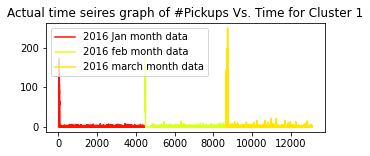

In [102]:
#Example of time series data
#Here, I'm plotting actual time series graph for pickups in cluster 1 again as plotted above.

first_x = list(range(0,4464))
second_x = list(range(4464,8640))
third_x = list(range(8640,13104))

plt.figure(figsize=(5,2))
plt.plot(first_x,regions_cum[1][:4464], color=uniqueish_color(), label='2016 Jan month data')
plt.plot(second_x,regions_cum[1][4464:8640], color=uniqueish_color(), label='2016 feb month data')
plt.plot(third_x,regions_cum[1][8640:], color=uniqueish_color(), label='2016 march month data')
plt.title('Actual time seires graph of #Pickups Vs. Time for Cluster 1')
plt.legend()
plt.show()

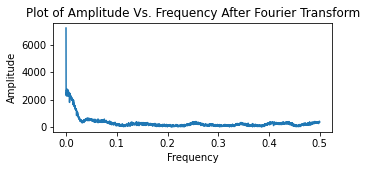

In [103]:
#Example of data in frequency domain, I have applied FFT on pickup data in cluster 1

# read more about fft function : https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fft.html
Y    = np.fft.fft(np.array(regions_cum[1][:4464]))
# read more about the fftfreq: https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fftfreq.html  
freq = np.fft.fftfreq(4464, 1)
n = len(freq)

plt.figure(figsize=(5,2))
plt.plot( freq[:int(n/2)], np.abs(Y)[:int(n/2)] )
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.title('Plot of Amplitude Vs. Frequency After Fourier Transform')
plt.show()

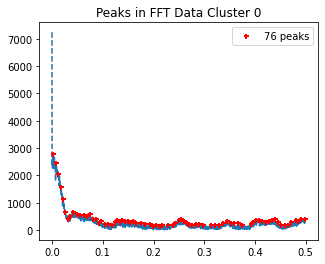

In [104]:
#Plotting peaks in FFT data
#Ref: https://stackoverflow.com/questions/37719613/detecting-peaks-in-a-fft-plot
#Ref: https://peakutils.readthedocs.io/en/latest/tutorial_a.html#getting-a-first-estimate-of-the-peaks

from peakutils.plot import plot as pplot

%matplotlib inline
x = freq[:int(n/2)]
y = np.abs(Y)[:int(n/2)]
indexes = peakutils.indexes(y, thres=0.02, min_dist=20)
plt.figure(figsize=(5,4))
pplot(x, y, indexes)
plt.title('Peaks in FFT Data Cluster 0')
plt.show()

In [105]:
#Storing Amplitides and Frequencies for top 5 peaks.

top5_amp=[]
top5_freq=[]

for i in indexes[:5]:
    top5_amp.append(y[i])
    top5_freq.append(x[i])
    
print('Amplitudes of top 5 peaks for Cluster 0: ',top5_amp)
print('\nFrequencies of top 5 peaks for Cluster 0: ',top5_freq)

Amplitudes of top 5 peaks for Cluster 0:  [2775.51060050646, 2467.056031998503, 2050.9520275578666, 1586.2232886061274, 1118.263758418242]

Frequencies of top 5 peaks for Cluster 0:  [0.0020161290322580645, 0.00739247311827957, 0.01232078853046595, 0.017025089605734768, 0.021729390681003585]


In [106]:
#Calculating top 5 Amplitudes and Frequencies for each cluster and month pair

Y    = np.fft.fft(np.array(regions_cum[1][:4464]))
freq = np.fft.fftfreq(4464, 1)
n = len(freq)
x = freq[:int(n/2)]

y = np.abs(Y)[:int(n/2)]
indexes = peakutils.indexes(y, thres=0.02, min_dist=20)

In [107]:
top5_lst = []
top5_lst_j = []

for i in range(40):
    Y = np.fft.fft(np.array(regions_cum[i][:4464]))
    freq = np.fft.fftfreq(4464, 1)
    n = len(freq)
    x = freq[:int(n/2)]
    y = np.abs(Y)[:int(n/2)]
    indexes = peakutils.indexes(y, thres=0.02, min_dist=20)
    top5_amp=[]
    top5_freq=[]
    top5_lst_j = []
    clust_no = []
    clust_no.append(i)
    
    for j in indexes[:5]:
        top5_amp.append(y[j])
        top5_freq.append(x[j])
        
    top5_lst_j = clust_no+top5_amp + top5_freq
    top5_lst.append(top5_lst_j)


col = ['cluster','amp1','amp2','amp3','amp4','amp5','fr1','fr2','fr3','fr4','fr5']
df_top5 = pd.DataFrame(top5_lst,columns=col)

In [108]:
df_top5.head()

cluster          amp1           amp2  ...       fr3       fr4       fr5
0        0  26959.688163  121021.958988  ...  0.013889  0.020833  0.026882
1        1   2775.510601    2467.056032  ...  0.012321  0.017025  0.021729
2        2  36116.653150   80723.584512  ...  0.013889  0.020833  0.027778
3        3  36955.846515   81370.329121  ...  0.013889  0.020833  0.027778
4        4  40457.939498  129851.847070  ...  0.013889  0.027778  0.034722

[5 rows x 11 columns]

In [109]:
df_top5.shape

(40, 11)

In [110]:
#Adding this Fourier Features in train and test data frames
#Ref: https://www.geeksforgeeks.org/how-to-do-a-vlookup-in-python-using-pandas/


df_train_fourier = pd.merge(df_train,df_top5, on='cluster', how='inner')
df_test_fourier = pd.merge(df_test,df_top5, on='cluster', how='inner')

In [111]:
df_train_fourier.head()

ft_5  ft_4  ft_3  ft_2  ...       fr2       fr3       fr4       fr5
0     0     0     0     0  ...  0.006944  0.013889  0.020833  0.026882
1     0     0     0     0  ...  0.006944  0.013889  0.020833  0.026882
2     0     0     0     0  ...  0.006944  0.013889  0.020833  0.026882
3     0     0     0     0  ...  0.006944  0.013889  0.020833  0.026882
4     0     0     0     0  ...  0.006944  0.013889  0.020833  0.026882

[5 rows x 20 columns]

In [112]:
df_test_fourier.head()

ft_5  ft_4  ft_3  ft_2  ...       fr2       fr3       fr4       fr5
0   143   145   119   113  ...  0.006944  0.013889  0.020833  0.026882
1   145   119   113   124  ...  0.006944  0.013889  0.020833  0.026882
2   119   113   124   121  ...  0.006944  0.013889  0.020833  0.026882
3   113   124   121   131  ...  0.006944  0.013889  0.020833  0.026882
4   124   121   131   110  ...  0.006944  0.013889  0.020833  0.026882

[5 rows x 20 columns]

#### Standardizing columns with numerical data & encoding categorical features

In [113]:
def fn_column_standardizer(df_train, df_test, list_columns):
    '''
    This function accepts train and test dataframes and list of numeric columns as input 
    and returns two dataframes with all numeric columns standardized.
    
    Ref: Standardizing the data sklearn: https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832
         Appending arrays to DF: https://stackoverflow.com/a/68109545/11603575
    '''
    
    df_train_std = pd.DataFrame(columns=list_columns)
    df_test_std = pd.DataFrame(columns=list_columns)
    
    from sklearn.preprocessing import StandardScaler
    
    for i in list_columns:
        print('Working on column: ', i)
        std = StandardScaler()
        std_data_train = std.fit_transform((df_train[i]).values.reshape(-1,1))
        std_data_test = std.transform((df_test[i]).values.reshape(-1,1))

        df_train_std[i] = std_data_train.flatten()
        df_test_std[i] = std_data_test.flatten()
    
    
    return df_train_std, df_test_std

In [114]:
# Standardizing the columns with numerical values in train and test df.
#we are not standardizing columns line lat, long, cluster, weekday as they are categorical in nature.

list_columns = ['ft_5','ft_4','ft_3','ft_2','ft_1','exp_avg','amp1','amp2','amp3','amp4','amp5','fr1','fr2','fr3','fr4','fr5']
df_train_std, df_test_std = fn_column_standardizer(df_train_fourier, df_test_fourier, list_columns)

Working on column:  ft_5
Working on column:  ft_4
Working on column:  ft_3
Working on column:  ft_2
Working on column:  ft_1
Working on column:  exp_avg
Working on column:  amp1
Working on column:  amp2
Working on column:  amp3
Working on column:  amp4
Working on column:  amp5
Working on column:  fr1
Working on column:  fr2
Working on column:  fr3
Working on column:  fr4
Working on column:  fr5


In [115]:
df_train_std.head()

ft_5      ft_4      ft_3  ...       fr3       fr4       fr5
0 -0.968572 -0.968657 -0.968751  ... -0.131602 -0.287462 -0.610065
1 -0.968572 -0.968657 -0.968751  ... -0.131602 -0.287462 -0.610065
2 -0.968572 -0.968657 -0.968751  ... -0.131602 -0.287462 -0.610065
3 -0.968572 -0.968657 -0.968751  ... -0.131602 -0.287462 -0.610065
4 -0.968572 -0.968657 -0.968751  ... -0.131602 -0.287462 -0.610065

[5 rows x 16 columns]

In [116]:
df_test_std.head()

ft_5      ft_4      ft_3  ...       fr3       fr4       fr5
0  1.308502  1.340138  0.925984  ... -0.131602 -0.287462 -0.610065
1  1.340349  0.926147  0.830451  ... -0.131602 -0.287462 -0.610065
2  0.926336  0.830611  1.005594  ... -0.131602 -0.287462 -0.610065
3  0.830794  1.005761  0.957828  ... -0.131602 -0.287462 -0.610065
4  1.005954  0.957993  1.117049  ... -0.131602 -0.287462 -0.610065

[5 rows x 16 columns]

In [117]:
# Encoding categorical features using One Hot Encoding
# Ref: Previous assignment submissions
#      OneHotEncoder documentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
#      Value error resolution: https://towardsdatascience.com/how-to-encode-categorical-columns-using-python-9af10b36f049

# from sklearn.preprocessing import OneHotEncoder
'''
def fn_column_encoder(df_train, df_test, list_columns):
    '''
    #This function accepts train and test dataframes and a list of column names to be vectorized.
    #Function returns two dataframes with only encoded columns.
'''
    
    
    for i in list_columns:
        print('Working on column: ', i)
        enc = OneHotEncoder()
        enc_data_train = enc.fit_transform((df_train[i]).values.reshape(-1, 1))
        enc_data_test = enc.transform((df_test[i]).values.reshape(-1, 1))
        print('Feature names: ',enc.get_feature_names())
        print(type(enc_data_train))

        #df_train_enc[i] = enc_data_train.flatten()
        #df_test_enc[i] = enc_data_test.flatten()
        
        df_train_enc = pd.DataFrame.sparse.from_spmatrix(enc_data_train)
    
    
    return df_train_enc, df_test_enc
'''


"\n    \n    \n    for i in list_columns:\n        print('Working on column: ', i)\n        enc = OneHotEncoder()\n        enc_data_train = enc.fit_transform((df_train[i]).values.reshape(-1, 1))\n        enc_data_test = enc.transform((df_test[i]).values.reshape(-1, 1))\n        print('Feature names: ',enc.get_feature_names())\n        print(type(enc_data_train))\n\n        #df_train_enc[i] = enc_data_train.flatten()\n        #df_test_enc[i] = enc_data_test.flatten()\n        \n        df_train_enc = pd.DataFrame.sparse.from_spmatrix(enc_data_train)\n    \n    \n    return df_train_enc, df_test_enc\n"

In [118]:
#list_cat_columns = ['cluster','weekday','lat','lon']
#df_tarin_enc, df_test_enc = fn_column_encoder(df_train_fourier, df_test_fourier, list_cat_columns)

In [119]:
# Ecncoding categorical variables using OHE

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
enc_data_train_cluster = enc.fit_transform((df_train['cluster']).values.reshape(-1, 1))
enc_data_test_cluster = enc.transform((df_test['cluster']).values.reshape(-1, 1))
print('Feature Name: \'Cluster\'')
print('Shape before encoding: Train: '+str(df_train['cluster'].shape)+' Test: '+str(df_test['cluster'].shape) )
print('Shape after encoding: Train: '+str(enc_data_test_cluster.shape)+' Test: '+str(enc_data_train_cluster.shape) )
print('-'*75)

enc = OneHotEncoder()
enc_data_train_weekday = enc.fit_transform((df_train['weekday']).values.reshape(-1, 1))
enc_data_test_weekday = enc.transform((df_test['weekday']).values.reshape(-1, 1))
print('Feature Name: \'weekday\'')
print('Shape before encoding: Train: '+str(df_train['weekday'].shape)+' Test: '+str(df_test['weekday'].shape) )
print('Shape after encoding: Train: '+str(enc_data_test_weekday.shape)+' Test: '+str(enc_data_train_weekday.shape) )
print('-'*75)

enc = OneHotEncoder()
enc_data_train_lat = enc.fit_transform((df_train['lat']).values.reshape(-1, 1))
enc_data_test_lat = enc.transform((df_test['lat']).values.reshape(-1, 1))
print('Feature Name: \'lat\'')
print('Shape before encoding: Train: '+str(df_train['lat'].shape)+' Test: '+str(df_test['lat'].shape) )
print('Shape after encoding: Train: '+str(enc_data_test_lat.shape)+' Test: '+str(enc_data_train_lat.shape) )
print('-'*75)

enc = OneHotEncoder()
enc_data_train_lon = enc.fit_transform((df_train['lon']).values.reshape(-1, 1))
enc_data_test_lon = enc.transform((df_test['lon']).values.reshape(-1, 1))
print('Feature Name: \'lon\'')
print('Shape before encoding: Train: '+str(df_train['lon'].shape)+' Test: '+str(df_test['lon'].shape) )
print('Shape after encoding: Train: '+str(enc_data_test_lon.shape)+' Test: '+str(enc_data_train_lon.shape) )
print('-'*75)

Feature Name: 'Cluster'
Shape before encoding: Train: (366760,) Test: (157200,)
Shape after encoding: Train: (157200, 40) Test: (366760, 40)
---------------------------------------------------------------------------
Feature Name: 'weekday'
Shape before encoding: Train: (366760,) Test: (157200,)
Shape after encoding: Train: (157200, 7) Test: (366760, 7)
---------------------------------------------------------------------------
Feature Name: 'lat'
Shape before encoding: Train: (366760,) Test: (157200,)
Shape after encoding: Train: (157200, 40) Test: (366760, 40)
---------------------------------------------------------------------------
Feature Name: 'lon'
Shape before encoding: Train: (366760,) Test: (157200,)
Shape after encoding: Train: (157200, 40) Test: (366760, 40)
---------------------------------------------------------------------------


In [120]:
type(enc_data_test_cluster)

scipy.sparse.csr.csr_matrix

In [121]:
#Stacking all encoded matrices and appending them to the training dataframes

from scipy.sparse import hstack

enc_train = hstack((enc_data_train_cluster,enc_data_train_weekday,enc_data_train_lat,enc_data_train_lon)).tocsr()
enc_test = hstack((enc_data_test_cluster,enc_data_test_weekday,enc_data_test_lat,enc_data_test_lon)).tocsr()


In [122]:
enc_train.shape

(366760, 127)

In [123]:
#converting sparse matirx to pandas dataframes
#Ref: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sparse.from_spmatrix.html

df_train_enc = pd.DataFrame.sparse.from_spmatrix(enc_train)
df_test_enc = pd.DataFrame.sparse.from_spmatrix(enc_test)

In [124]:
#ref: https://stackoverflow.com/questions/60030633/pandas-valueerror-any-way-to-convert-sparsefloat64-0-0-dtypes-to-float64
df_train_enc = df_train_enc.sparse.to_dense()
df_test_enc = df_test_enc.sparse.to_dense()

In [125]:
#adding remaining columns to the final encoded dataframes
# wont be adding these columns again as they are already encoded using OHE, we'll add encoded columns to the dataframes

'''
df_train_std['lat'] = df_train_fourier['lat']
df_train_std['lon'] = df_train_fourier['lon']
df_train_std['weekday'] = df_train_fourier['weekday']
df_train_std['cluster'] = df_train_fourier['cluster']

df_test_std['lat'] = df_test_fourier['lat']
df_test_std['lon'] = df_test_fourier['lon']
df_test_std['weekday'] = df_test_fourier['weekday']
df_test_std['cluster'] = df_test_fourier['cluster']

'''

"\ndf_train_std['lat'] = df_train_fourier['lat']\ndf_train_std['lon'] = df_train_fourier['lon']\ndf_train_std['weekday'] = df_train_fourier['weekday']\ndf_train_std['cluster'] = df_train_fourier['cluster']\n\ndf_test_std['lat'] = df_test_fourier['lat']\ndf_test_std['lon'] = df_test_fourier['lon']\ndf_test_std['weekday'] = df_test_fourier['weekday']\ndf_test_std['cluster'] = df_test_fourier['cluster']\n\n"

In [126]:
#final data metrices
df_train_std.head()

ft_5      ft_4      ft_3  ...       fr3       fr4       fr5
0 -0.968572 -0.968657 -0.968751  ... -0.131602 -0.287462 -0.610065
1 -0.968572 -0.968657 -0.968751  ... -0.131602 -0.287462 -0.610065
2 -0.968572 -0.968657 -0.968751  ... -0.131602 -0.287462 -0.610065
3 -0.968572 -0.968657 -0.968751  ... -0.131602 -0.287462 -0.610065
4 -0.968572 -0.968657 -0.968751  ... -0.131602 -0.287462 -0.610065

[5 rows x 16 columns]

In [127]:
df_test_std.head()

ft_5      ft_4      ft_3  ...       fr3       fr4       fr5
0  1.308502  1.340138  0.925984  ... -0.131602 -0.287462 -0.610065
1  1.340349  0.926147  0.830451  ... -0.131602 -0.287462 -0.610065
2  0.926336  0.830611  1.005594  ... -0.131602 -0.287462 -0.610065
3  0.830794  1.005761  0.957828  ... -0.131602 -0.287462 -0.610065
4  1.005954  0.957993  1.117049  ... -0.131602 -0.287462 -0.610065

[5 rows x 16 columns]

In [128]:
# Merging two dataframes on index: https://stackoverflow.com/a/40468090/11603575

df_train_fin = pd.merge(df_train_std, df_train_enc, left_index=True, right_index=True)
df_test_fin = pd.merge(df_test_std, df_test_enc, left_index=True, right_index=True)


In [129]:
#Final train and test dataframes:

df_train_fin.head()

ft_5      ft_4      ft_3      ft_2      ft_1  ...  122  123  124  125  126
0 -0.968572 -0.968657 -0.968751 -0.968849 -0.968957  ...  0.0  0.0  0.0  0.0  0.0
1 -0.968572 -0.968657 -0.968751 -0.968849 -0.968957  ...  0.0  0.0  0.0  0.0  0.0
2 -0.968572 -0.968657 -0.968751 -0.968849 -0.968957  ...  0.0  0.0  0.0  0.0  0.0
3 -0.968572 -0.968657 -0.968751 -0.968849 -0.968957  ...  0.0  0.0  0.0  0.0  0.0
4 -0.968572 -0.968657 -0.968751 -0.968849 -0.968957  ...  0.0  0.0  0.0  0.0  0.0

[5 rows x 143 columns]

In [130]:
df_test_fin.head()

ft_5      ft_4      ft_3      ft_2      ft_1  ...  122  123  124  125  126
0  1.308502  1.340138  0.925984  0.830305  1.005315  ...  0.0  0.0  0.0  0.0  0.0
1  1.340349  0.926147  0.830451  1.005444  0.957551  ...  0.0  0.0  0.0  0.0  0.0
2  0.926336  0.830611  1.005594  0.957679  1.116766  ...  0.0  0.0  0.0  0.0  0.0
3  0.830794  1.005761  0.957828  1.116896  0.782414  ...  0.0  0.0  0.0  0.0  0.0
4  1.005954  0.957993  1.117049  0.782540  0.877943  ...  0.0  0.0  0.0  0.0  0.0

[5 rows x 143 columns]

In [131]:
# Ref: For resolving ValueError: Input contains NaN, infinity or a value too large for dtype('float64')
# Ref: https://stackoverflow.com/a/47957914/11603575
# Ref: https://www.geeksforgeeks.org/replace-nan-values-with-zeros-in-pandas-dataframe/

df_train_fin = df_train_fin.fillna(0)
df_test_fin = df_test_fin.fillna(0)

### Using Linear Regression on data with fourier features

In [132]:
# find more about LinearRegression function here http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
# -------------------------
# default paramters
# sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)

# some of methods of LinearRegression()
# fit(X, y[, sample_weight])	Fit linear model.
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict using the linear model
# score(X, y[, sample_weight])	Returns the coefficient of determination R^2 of the prediction.
# set_params(**params)	Set the parameters of this estimator.
# -----------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1-2-copy-8/
# -----------------------

from sklearn.linear_model import LinearRegression
lr_reg=LinearRegression().fit(df_train_fin, tsne_train_output)

y_pred = lr_reg.predict(df_test_fin)
lr_test_predictions = [round(value) for value in y_pred]
y_pred = lr_reg.predict(df_train_fin)
lr_train_predictions = [round(value) for value in y_pred]

### Using Random Forest Regressor on data with fourier features

In [135]:
# Training a hyper-parameter tuned random forest regressor on our train data
# find more about LinearRegression function here http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
# -------------------------
# default paramters
# sklearn.ensemble.RandomForestRegressor(n_estimators=10, criterion=’mse’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False)

# some of methods of RandomForestRegressor()
# apply(X)	Apply trees in the forest to X, return leaf indices.
# decision_path(X)	Return the decision path in the forest
# fit(X, y[, sample_weight])	Build a forest of trees from the training set (X, y).
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict regression target for X.
# score(X, y[, sample_weight])	Returns the coefficient of determination R^2 of the prediction.
# -----------------------
# video link1: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/regression-using-decision-trees-2/
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

regr1 = RandomForestRegressor(max_features='sqrt',min_samples_leaf=4,min_samples_split=3,n_estimators=40, n_jobs=-1)
regr1.fit(df_train_fin, tsne_train_output)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=3, min_weight_fraction_leaf=0.0,
                      n_estimators=40, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [136]:
# Predicting on test data using our trained random forest model 

# the models regr1 is already hyper parameter tuned
# the parameters that we got above are found using grid search

y_pred = regr1.predict(df_test_fin)
rndf_test_predictions = [round(value) for value in y_pred]
y_pred = regr1.predict(df_train_fin)
rndf_train_predictions = [round(value) for value in y_pred]

In [137]:
#feature importances based on analysis using random forest
print (df_train_fin.columns)
print (regr1.feature_importances_)

Index([   'ft_5',    'ft_4',    'ft_3',    'ft_2',    'ft_1', 'exp_avg',
          'amp1',    'amp2',    'amp3',    'amp4',
       ...
             117,       118,       119,       120,       121,       122,
             123,       124,       125,       126],
      dtype='object', length=143)
[9.22081619e-02 1.54177378e-01 1.54583663e-01 1.93044114e-01
 1.77186807e-01 1.53400631e-01 7.35082756e-03 8.81368208e-03
 5.65142698e-03 5.02258748e-03 6.10889856e-03 1.95271141e-03
 6.61775792e-03 2.64776668e-03 2.02824408e-03 3.48934590e-03
 1.83573135e-04 1.85138104e-03 1.83636055e-05 1.74730925e-04
 1.92635721e-05 3.04035309e-05 5.83767440e-05 1.78217262e-04
 4.82330930e-04 5.32437222e-05 9.32360771e-05 3.78373526e-05
 3.84664740e-05 4.65685677e-05 4.35869236e-05 3.51499235e-05
 1.98691771e-04 1.50245445e-05 3.53807212e-04 1.78506808e-05
 5.30983704e-04 4.24707625e-04 2.32524094e-04 1.58771530e-05
 3.31754254e-05 1.81472637e-05 1.66003121e-05 4.43803837e-05
 8.58641926e-05 1.87888812e-04 5.70

### Using XgBoost Regressor on data with fourier features

In [138]:
'''
df_train_fin = df_train_fin.astype('float64')
df_test_fin = df_test_fin.astype('float64')

df_train_fin = df_train_fin.sparse.to_dense()
df_test_fin = df_test_fin.sparse.to_dense()
'''

"\ndf_train_fin = df_train_fin.astype('float64')\ndf_test_fin = df_test_fin.astype('float64')\n\ndf_train_fin = df_train_fin.sparse.to_dense()\ndf_test_fin = df_test_fin.sparse.to_dense()\n"

In [139]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBRegressor function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#module-xgboost.sklearn
# -------------------------
# default paramters
# xgboost.XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, objective='reg:linear', 
# booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, 
# colsample_bylevel=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, 
# missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link1: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/regression-using-decision-trees-2/
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

x_model = xgb.XGBRegressor(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=3,
 gamma=0,
 tree_method= 'gpu_hist',
 subsample=0.8,
 reg_alpha=200, reg_lambda=200,
 colsample_bytree=0.8,nthread=4)

x_model.fit(df_train_fin, tsne_train_output)

[02:32:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=3, missing=None, n_estimators=1000,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=200, reg_lambda=200, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.8, tree_method='gpu_hist', verbosity=1)

In [140]:
#predicting with our trained Xg-Boost regressor
# the models x_model is already hyper parameter tuned
# the parameters that we got above are found using grid search

y_pred = x_model.predict(df_test_fin)
xgb_test_predictions = [round(value) for value in y_pred]
y_pred = x_model.predict(df_train_fin)
xgb_train_predictions = [round(value) for value in y_pred]

In [141]:
#feature importances
#Ref: To solve NoneType not callable error: https://datascience.stackexchange.com/a/40812

x_model.get_booster().get_score(importance_type='weight')

{'0': 52,
 '1': 1,
 '10': 9,
 '100': 1,
 '101': 2,
 '103': 3,
 '108': 1,
 '109': 1,
 '11': 3,
 '115': 1,
 '116': 1,
 '12': 4,
 '122': 1,
 '123': 5,
 '125': 2,
 '126': 1,
 '14': 2,
 '15': 4,
 '16': 3,
 '2': 1,
 '21': 1,
 '22': 4,
 '23': 9,
 '24': 1,
 '25': 2,
 '26': 3,
 '27': 3,
 '28': 4,
 '29': 3,
 '3': 49,
 '30': 12,
 '32': 2,
 '33': 1,
 '34': 59,
 '35': 13,
 '36': 15,
 '37': 1,
 '38': 1,
 '39': 11,
 '4': 2,
 '40': 19,
 '41': 28,
 '42': 60,
 '43': 31,
 '44': 36,
 '45': 30,
 '46': 31,
 '48': 2,
 '5': 1,
 '54': 1,
 '56': 2,
 '58': 5,
 '6': 1,
 '60': 1,
 '62': 1,
 '63': 1,
 '64': 1,
 '66': 1,
 '69': 13,
 '7': 4,
 '72': 1,
 '73': 2,
 '74': 2,
 '75': 1,
 '76': 1,
 '77': 2,
 '78': 8,
 '8': 8,
 '81': 9,
 '82': 2,
 '83': 3,
 '85': 2,
 '86': 1,
 '96': 6,
 'amp1': 227,
 'amp2': 177,
 'amp3': 154,
 'amp4': 161,
 'amp5': 126,
 'exp_avg': 765,
 'fr1': 85,
 'fr2': 96,
 'fr3': 51,
 'fr4': 73,
 'fr5': 122,
 'ft_1': 1069,
 'ft_2': 966,
 'ft_3': 745,
 'ft_4': 615,
 'ft_5': 928}

### Calculating the error metric values for various models

In [142]:
train_mape=[]
test_mape=[]

train_mape.append((mean_absolute_error(tsne_train_output,df_train_fourier['ft_1'].values))/(sum(tsne_train_output)/len(tsne_train_output)))
train_mape.append((mean_absolute_error(tsne_train_output,df_train_fourier['exp_avg'].values))/(sum(tsne_train_output)/len(tsne_train_output)))
train_mape.append((mean_absolute_error(tsne_train_output,rndf_train_predictions))/(sum(tsne_train_output)/len(tsne_train_output)))
train_mape.append((mean_absolute_error(tsne_train_output, xgb_train_predictions))/(sum(tsne_train_output)/len(tsne_train_output)))
train_mape.append((mean_absolute_error(tsne_train_output, lr_train_predictions))/(sum(tsne_train_output)/len(tsne_train_output)))

test_mape.append((mean_absolute_error(tsne_test_output, df_test_fourier['ft_1'].values))/(sum(tsne_test_output)/len(tsne_test_output)))
test_mape.append((mean_absolute_error(tsne_test_output, df_test_fourier['exp_avg'].values))/(sum(tsne_test_output)/len(tsne_test_output)))
test_mape.append((mean_absolute_error(tsne_test_output, rndf_test_predictions))/(sum(tsne_test_output)/len(tsne_test_output)))
test_mape.append((mean_absolute_error(tsne_test_output, xgb_test_predictions))/(sum(tsne_test_output)/len(tsne_test_output)))
test_mape.append((mean_absolute_error(tsne_test_output, lr_test_predictions))/(sum(tsne_test_output)/len(tsne_test_output)))

In [143]:
'''
print ("Error Metric Matrix (Tree Based Regression Methods) -  MAPE")
print ("--------------------------------------------------------------------------------------------------------")
print ("Baseline Model -                             Train: ",train_mape[0],"      Test: ",test_mape[0])
print ("Exponential Averages Forecasting -           Train: ",train_mape[1],"      Test: ",test_mape[1])
print ("Linear Regression -                         Train: ",train_mape[3],"      Test: ",test_mape[3])
print ("Random Forest Regression -                   Train: ",train_mape[2],"     Test: ",test_mape[2])
'''

'\nprint ("Error Metric Matrix (Tree Based Regression Methods) -  MAPE")\nprint ("--------------------------------------------------------------------------------------------------------")\nprint ("Baseline Model -                             Train: ",train_mape[0],"      Test: ",test_mape[0])\nprint ("Exponential Averages Forecasting -           Train: ",train_mape[1],"      Test: ",test_mape[1])\nprint ("Linear Regression -                         Train: ",train_mape[3],"      Test: ",test_mape[3])\nprint ("Random Forest Regression -                   Train: ",train_mape[2],"     Test: ",test_mape[2])\n'

### Error Metric Matrix

In [144]:
print ("Error Metric Matrix (Tree Based Regression Methods) -  MAPE")
print ("--------------------------------------------------------------------------------------------------------")
print ("Baseline Model -                             Train: ",train_mape[0],"      Test: ",test_mape[0])
print ("Exponential Averages Forecasting -           Train: ",train_mape[1],"      Test: ",test_mape[1])
print ("Linear Regression -                         Train: ",train_mape[4],"      Test: ",test_mape[4])
print ("Random Forest Regression -                   Train: ",train_mape[2],"     Test: ",test_mape[2])
print ("XgBoost Regression -                         Train: ",train_mape[3],"      Test: ",test_mape[3])
print ("--------------------------------------------------------------------------------------------------------")

Error Metric Matrix (Tree Based Regression Methods) -  MAPE
--------------------------------------------------------------------------------------------------------
Baseline Model -                             Train:  0.14870666996426116       Test:  0.14225522601041551
Exponential Averages Forecasting -           Train:  0.14121603560900353       Test:  0.13490049942819257
Linear Regression -                         Train:  0.14212055963123446       Test:  0.13483583101240829
Random Forest Regression -                   Train:  0.1135996521667924      Test:  0.13239106102068032
XgBoost Regression -                         Train:  0.1383640882102649       Test:  0.13246266158676162
--------------------------------------------------------------------------------------------------------


Conclusion from task 1: 
1. There is only slight change in the metrics after adding fourier features.
2. Best model is XgBoost as it has least train and test error

### Task 2: Hyperparameter Optimization for all regression models

In [145]:
# Ref: Code used in previous assignments
# Ref: Hyperparameter tuning : https://www.geeksforgeeks.org/hyperparameter-tuning/
# Ref: Hyperparameter tuning in SGDRegressor: https://nitin9809.medium.com/linear-regression-with-gradient-descent-maths-implementation-and-example-using-scikit-learn-1ed1ed3440cc

##### 2a. Hyperparameter Tuning in LinearRegression

In [168]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor
from time import sleep

In [172]:
#Here we will use SGDRegressor instead of LinearRegression as SGDRegressor has hyperparameters like alpha(learning rate), 
# which is notpossible in  linearregression().
start = time.time()
clf_lr = SGDRegressor(loss = "squared_loss", penalty = "l2")

params={
    'alpha':[ 10**-4, 10**-2,10**-1, 10**0, 10**2]
}

best_clf_lr = GridSearchCV(clf_lr, params, scoring = "neg_mean_absolute_error", cv = 3,n_jobs = -1)
best_clf_lr.fit(df_train_fin, tsne_train_output)

print('Time for execution (min): ', (time.time()-start)/60)

Time for execution (min):  1.7581587513287862


In [173]:
best_alpha = best_clf_lr.best_params_["alpha"]
# best_learning_rate = best_clf_lr.best_params_["learning_rate"]
# best_max_iter = best_clf_lr.best_params_["max_iter"]

print('Best alpha: ', best_alpha)
# print('Best learning rate: ', best_learning_rate)
# print('Best Max Iteration: ', best_max_iter)

Best alpha:  0.01


In [174]:
#applying linear regression with best hyper-parameter
clf_lr_best = SGDRegressor(loss = "squared_loss", alpha=best_alpha, penalty = "l2")
clf_lr_best.fit(df_train_fin, tsne_train_output)
train_pred = clf_lr_best.predict(df_train_fin)

In [175]:
train_MAPE = mean_absolute_error(tsne_train_output, train_pred) / (sum(tsne_train_output)/len(tsne_train_output))
train_MSE = mean_squared_error(tsne_train_output, train_pred)
test_pred = clf_lr_best.predict(df_test_fin)
test_MAPE = mean_absolute_error(tsne_test_output, test_pred)/ (sum(tsne_test_output)/len(tsne_test_output))
test_MSE = mean_squared_error(tsne_test_output, test_pred)

In [176]:
print('Score of SGD Regressor after hyperparameter tuning:')
print('Train MAPE: ', train_MAPE)
print('Test MAPE: ', test_MAPE)
print('Train MSE: ', train_MSE)
print('Test MSE: ', test_MSE)

Score of SGD Regressor after hyperparameter tuning:
Train MAPE:  0.14302839653298374
Test MAPE:  0.13578952566368455
Train MSE:  210.52493892685
Test MSE:  210.01810350578785


##### 2b. Hyperparameter Tuning in Random Forest using Random Search

I'm usig colab pro and for that as well my notebook is consuming more memory than allowed while training the sklearn's randomforest with hyperparameter tuning.

So here, I have used Random Forest Regressor from the XGBoost library instead of the usual SKLearn implementation as XGBRFregressor() supports training over GPUs. 

References:
1. XGBoost docs: https://xgboost.readthedocs.io/en/latest/tutorials/rf.html#random-forests-tm-in-xgboost

2. Using GPUs with XGBoost: https://coderzcolumn.com/tutorials/machine-learning/xgboost-an-in-depth-guide-python#3.1

3. https://machinelearningmastery.com/random-forest-ensembles-with-xgboost/

4. https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74


In [ ]:
'''
import xgboost as xgb

start = time()

# Parameter Grid for XGBRFRegressor:

params = {
 
  'learning_rate': [0.1,1],
  'max_depth': [5,10],
  'num_parallel_tree': [50,100,1000,2000],
  'objective': ['reg:squarederror'],
  'subsample': [0.8]

}

xgb_model_rf = xgb.XGBRFRegressor(random_state=42, tree_method='gpu_hist',n_jobs = 4) #initializing XGBRFRegressor instance

best_clf_xrf = GridSearchCV(xgb_model_rf, params, scoring = "neg_mean_absolute_error", cv = 3,n_jobs = 4)
best_clf_xrf.fit(df_train_fin, tsne_train_output)

print('Time for execution (min): ', (time()-start)/60)
'''

In [ ]:
#Ref: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

start = time.time()

# Parameter Grid for XGBRFRegressor:

params = {
 
  'learning_rate': [0.1,1],
  'max_depth': [5,10],
  'num_parallel_tree': [50,100,1000,2000],
  'objective': ['reg:squarederror'],
  'subsample': [0.8]

}
xgb_model_rf = xgb.XGBRFRegressor(random_state=42, tree_method='gpu_hist',n_jobs = 4) #initializing XGBRFRegressor instance

rf_random = RandomizedSearchCV(estimator = xgb_model_rf, param_distributions = params, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(df_train_fin, tsne_train_output)

print('Time for execution (min): ', (time.time()-start)/60)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  7.6min finished


Time for execution (min):  7.785649196306864


In [ ]:
rf_random.best_params_

{'learning_rate': 1,
 'max_depth': 10,
 'num_parallel_tree': 50,
 'objective': 'reg:squarederror',
 'subsample': 0.8}

In [ ]:
#Training on best parameters and calculating the metrics

rf_random_best = xgb.XGBRFRegressor(learning_rate=1,max_depth=10,n_estimators=50,objective='reg:squarederror',random_state=42, tree_method='gpu_hist',n_jobs = 4) #initializing XGBRFRegressor instance
rf_random_best.fit(df_train_fin, tsne_train_output)
train_pred = rf_random_best.predict(df_train_fin)

In [ ]:
train_MAPE = mean_absolute_error(tsne_train_output, train_pred) / (sum(tsne_train_output)/len(tsne_train_output))
train_MSE = mean_squared_error(tsne_train_output, train_pred)
test_pred = rf_random_best.predict(df_test_fin)
test_MAPE = mean_absolute_error(tsne_test_output, test_pred)/ (sum(tsne_test_output)/len(tsne_test_output))
test_MSE = mean_squared_error(tsne_test_output, test_pred)

In [ ]:
print('Score of Random Forests after hyperparameter tuning:')
print('Train MAPE: ', train_MAPE)
print('Test MAPE: ', test_MAPE)
print('Train MSE: ', train_MSE)
print('Test MSE: ', test_MSE)

Score of Random Forests after hyperparameter tuning:
Train MAPE:  0.13876440658682523
Test MAPE:  0.13385974979462417
Train MSE:  189.9293848732471
Test MSE:  204.07049965400074


##### 2c. Hyperparameter Tuning in XGBoost using Random Search

In [ ]:
start = time.time()

# Parameter Grid for XGBRFRegressor:

params = {
 
  'learning_rate': [0.1,1],
  'max_depth': [5,10],
  'n_estimators': [50,100,1000,2000],
  'objective': ['reg:squarederror'],
  'subsample': [0.8]

}

x_model = xgb.XGBRegressor(

 tree_method= 'gpu_hist',
 n_jobs = -1
)
xgb_reg = RandomizedSearchCV(estimator = x_model, param_distributions = params, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

xgb_reg.fit(df_train_fin, tsne_train_output)

print('Time for execution (min): ', (time.time()-start)/60)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed: 28.0min finished


Time for execution (min):  28.055751093228658


In [ ]:
xgb_reg.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 50,
 'objective': 'reg:squarederror',
 'subsample': 0.8}

In [ ]:
xgb_reg_best = xgb.XGBRegressor(
 learning_rate = 1,
 max_depth = 5,
 n_estimators = 50,   
 tree_method= 'gpu_hist',
 objective = 'reg:squarederror',
 subsample = 0.8,
 n_jobs = -1 )

xgb_reg_best.fit(df_train_fin, tsne_train_output)
train_pred = xgb_reg_best.predict(df_train_fin)

In [ ]:
train_MAPE = mean_absolute_error(tsne_train_output, train_pred) / (sum(tsne_train_output)/len(tsne_train_output))
train_MSE = mean_squared_error(tsne_train_output, train_pred)
test_pred = xgb_reg_best.predict(df_test_fin)
test_MAPE = mean_absolute_error(tsne_test_output, test_pred)/ (sum(tsne_test_output)/len(tsne_test_output))
test_MSE = mean_squared_error(tsne_test_output, test_pred)

In [ ]:
print('Score of XGBoost after hyperparameter tuning:')
print('Train MAPE: ', train_MAPE)
print('Test MAPE: ', test_MAPE)
print('Train MSE: ', train_MSE)
print('Test MSE: ', test_MSE)

Score of XGBoost after hyperparameter tuning:
Train MAPE:  0.13719649990896585
Test MAPE:  0.13541679388745959
Train MSE:  179.21142837683138
Test MSE:  213.95461121988214


#### Calculating the error metric values for various models after hyperparameter tuning

In [178]:
print ("Error Metric Matrix (Tree Based Regression Methods) -  MAPE")
print ("--------------------------------------------------------------------------------------------------------")
print ("Linear Regression -                         Train: 0.1430     Test: 0.1357")
print ("Random Forest Regression -                   Train: 0.1387     Test: 0.13385")
print ("XgBoost Regression -                         Train: 0.1371      Test: 0.1354")
print ("--------------------------------------------------------------------------------------------------------")


Error Metric Matrix (Tree Based Regression Methods) -  MAPE
--------------------------------------------------------------------------------------------------------
Linear Regression -                         Train: 0.1430     Test: 0.1357
Random Forest Regression -                   Train: 0.1387     Test: 0.13385
XgBoost Regression -                         Train: 0.1371      Test: 0.1354
--------------------------------------------------------------------------------------------------------


## Task 3: Explore more time-series features using Google search/Quora/Stackoverflow to reduce the MAPE to < 12

To further reduce the MAPE, we will use exponential smoothing methods. 
> Exponential smoothing forecasting methods are similar in that a prediction is > a weighted sum of past observations, but the model explicitly uses an 
> exponentially decreasing weight for past observations.

>Forecasts produced using exponential smoothing methods are weighted averages of past observations, with the weights decaying exponentially as the observations get older. **In other words, the more recent the observation the higher the associated weight**.







Ref:
1. https://machinelearningmastery.com/exponential-smoothing-for-time-series-forecasting-in-python/
2. https://machinelearningmastery.com/how-to-grid-search-triple-exponential-smoothing-for-time-series-forecasting-in-python/
3. Basics of Holt-Winter's forcasting: https://medium.com/analytics-vidhya/holt-winters-forecasting-13c2e60d983f
4. Coding Holt-Winter's forcasting: https://medium.com/analytics-vidhya/python-code-on-holt-winters-forecasting-3843808a9873
5. Holt-Winters Forecasting for Dummies - Part III- https://grisha.org/blog/2016/02/17/triple-exponential-smoothing-forecasting-part-iii/
6. Holt-Winters Exponential Smoothing : https://towardsdatascience.com/holt-winters-exponential-smoothing-d703072c0572
7. Regarding the typeError: https://github.com/statsmodels/statsmodels/issues/7565
8. Gettinh Null values in prediction: https://stackoverflow.com/questions/64001999/exponential-smoothing-predicts-all-null-values

#### HWES Grisha's implementation

In [155]:
#Ref: Holt-Winters Forecasting for Dummies - Part III- https://grisha.org/blog/2016/02/17/triple-exponential-smoothing-forecasting-part-iii/
#     Discussion with team@appliedai over mails.

df_train_y = pd.DataFrame(data = tsne_train_output,columns=['y_train'])
#df_train_y.index.freq = 'd'
df_train_y.reset_index()

df_test_y = pd.DataFrame(data = tsne_test_output,columns=['y_test'])
#df_test_y.index.freq = 'd'
df_test_y.reset_index()

index  y_test
0            0     121
1            1     131
2            2     110
3            3     116
4            4     140
...        ...     ...
157195  157195       9
157196  157196       3
157197  157197       7
157198  157198       6
157199  157199       6

[157200 rows x 2 columns]

In [156]:
#Ref: Holt-Winters Forecasting for Dummies - Part III- https://grisha.org/blog/2016/02/17/triple-exponential-smoothing-forecasting-part-iii/
#     Discussion with team@appliedai over mails.

def initial_trend(series, slen):
    sum = 0.0
    for i in range(slen):
        sum += float(series[i+slen] - series[i]) / slen
    return sum / slen

In [134]:
#Ref: Holt-Winters Forecasting for Dummies - Part III- https://grisha.org/blog/2016/02/17/triple-exponential-smoothing-forecasting-part-iii/
#     Discussion with team@appliedai over mails.

def initial_seasonal_components(series, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(series)/slen)
    # compute season averages
    for j in range(n_seasons):
        season_averages.append(sum(series[slen*j:slen*j+slen])/float(slen))
    # compute initial values
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += series[slen*j+i]-season_averages[j]
        seasonals[i] = sum_of_vals_over_avg/n_seasons
    return seasonals

In [135]:
#Ref: Holt-Winters Forecasting for Dummies - Part III- https://grisha.org/blog/2016/02/17/triple-exponential-smoothing-forecasting-part-iii/
#     Discussion with team@appliedai over mails.

def triple_exponential_smoothing(series, slen, alpha, beta, gamma, n_preds):
    result = []
    seasonals = initial_seasonal_components(series, slen)
    for i in range(n_preds):
        if i == 0: # initial values
            smooth = series[0]
            trend = initial_trend(series, slen)
            result.append(series[0])
            continue
        if i >= len(series): # we are forecasting
            m = i - len(series) + 1
            result.append((smooth + m*trend) + seasonals[i%slen])
        else:
            val = series[i]
            last_smooth, smooth = smooth, alpha*(val-seasonals[i%slen]) + (1-alpha)*(smooth+trend)
            trend = beta * (smooth-last_smooth) + (1-beta)*trend
            seasonals[i%slen] = gamma*(val-smooth) + (1-gamma)*seasonals[i%slen]
            result.append(smooth+trend+seasonals[i%slen])
    return result

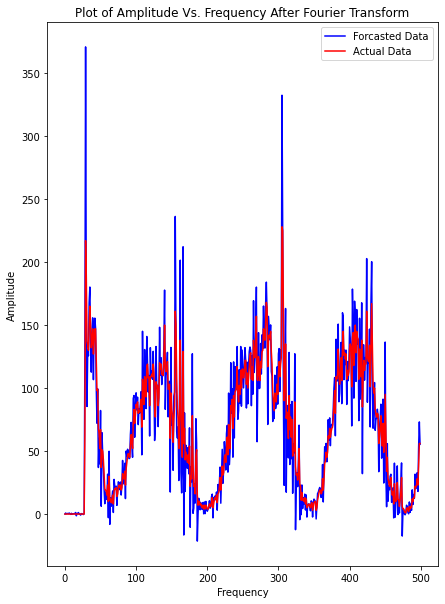

In [164]:
# Fitting triple exponential smoothing over train and test data and gettin the predictions.

forcast_hwes_train = triple_exponential_smoothing(tsne_train_output,144,1,1,1,366760)
forcast_hwes_test = triple_exponential_smoothing(tsne_test_output,144,1,1,1,157200)

df_train_fourier['HWES'] = forcast_hwes_train
df_test_fourier['HWES'] = forcast_hwes_test

# Plotting forcasted values vs. actual values of training data.

plt.figure(figsize=(7,10))
plt.plot( forcast_hwes_train[:500], 'b', label = 'Forcasted Data' )
plt.plot( tsne_train_output[:500], 'r', label ='Actual Data' )

plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.title('Plot of Amplitude Vs. Frequency After Fourier Transform')
plt.legend ()
plt.show()


###### Observations:
Here, I have determined the values of alpha, beta, gamma using trial and error by observing how well the predictions follow actual data on the graph and also how MAPE and MSE are changing after tarining the model on data obtained using various values of alpha, beta, gamma. <br>

I observed that, for the values of alpha = beta = gamma = 0.1, the forcasted trend was smooth and it almost closely followed the actual data, but the values of MAPE & MSE did not improve as comapred to data without triple exponential smoothing applied features.(MAPE was close to 13% & MSE was more than 200 for training and test data.)
<br>

For the values of alpha = beta = gamma = 1, the forcasted trend was not as smooth as it was values = 1, but it follwed the actual data well. Also, the values of MAPE and MSE significantly improved to 1.3% and 4 respectively. <br>

I chose to perform hyperparameter tuning on XGBRegressor() as it gave better results in previous steps and avoided overfitting.

#### Hyperparameter tuning - XGBoost on dataset with triple exponential smoothing features

In [196]:
start = time.time()

# Parameter Grid for XGBRFRegressor:

params = {
 
  'learning_rate': [0.1,1],
  'max_depth': [1,5,10,20],
  'n_estimators': [10,50,100,500],
  'objective': ['reg:squarederror'],
  'subsample': [0.8]

}

x_model = xgb.XGBRegressor(

 tree_method= 'gpu_hist',
 n_jobs = -1
)
xgb_reg = RandomizedSearchCV(estimator = x_model, param_distributions = params, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

xgb_reg.fit(df_train_fourier, df_train_y['y_train'])

print('Time for execution (min): ', (time.time()-start)/60)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed: 125.7min finished


Time for execution (min):  125.71677723328273


In [ ]:
xgb_reg.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 50,
 'objective': 'reg:squarederror',
 'subsample': 0.8}

In [165]:
 xgb_reg_best = xgb.XGBRegressor(
 learning_rate = 0.1,
 max_depth = 5,
 n_estimators = 50,   
 tree_method= 'gpu_hist',
 objective = 'reg:squarederror',
 subsample = 0.8,
 n_jobs = -1 )

xgb_reg_best.fit(df_train_fourier, df_train_y['y_train'])
train_pred = xgb_reg_best.predict(df_train_fourier)

In [166]:
train_MAPE = mean_absolute_error(df_train_y['y_train'], train_pred) / (sum(df_train_y['y_train'])/len(df_train_y['y_train']))
train_MSE = mean_squared_error(df_train_y['y_train'], train_pred)
test_pred = xgb_reg_best.predict(df_test_fourier)
test_MAPE = mean_absolute_error(df_test_y['y_test'], test_pred)/ (sum(df_test_y['y_test'])/len(df_test_y['y_test']))
test_MSE = mean_squared_error(df_test_y['y_test'], test_pred)

In [167]:
print('Score of XGBoost after hyperparameter tuning:')
print('Train MAPE: ', train_MAPE)
print('Test MAPE: ', test_MAPE)
print('Train MSE: ', train_MSE)
print('Test MSE: ', test_MSE)

Score of XGBoost after hyperparameter tuning:
Train MAPE:  0.013920996452238191
Test MAPE:  0.014335863393003375
Train MSE:  3.119424150549021
Test MSE:  4.19694845427885


##### Obtained train MAPE = 1.3% and test MAPE = 1.4%, objective is now achieved.

In [181]:
from prettytable import PrettyTable

In [188]:
table = PrettyTable()
table.field_names = ['Model', 'Train MAPE', 'Test MAPE']

table.add_rows(       
               [
                  ['Baseline', '0.1487', '0.1422'],
                  ['Exponential Average Forcasting', '0.1421', '0.1349'],
                  ['Linear Regression', '0.1383', '0.1326'],
                  ['Random Forest', '0.099', '0.1327']
               ] 
)
print('Baseline Model Performance')
print(table)
print('*'*100)

table1 = PrettyTable()
table1.field_names = ['Model', 'Train MAPE', 'Test MAPE']


table1.add_rows(       
               [
                  ['Linear Regression', '0.1421', '0.1348'],
                  ['Random Forest Reg.', '0.1135', '0.1329'],
                  ['XGBoost Regressor', '0.1383', '0.1324']

               ] 
)
print('\nTask 1: Model Performance on data with fourier features included')
print(table1)
print('*'*100)

table2 = PrettyTable()
table2.field_names = ['Model', 'Train MAPE', 'Test MAPE']


table2.add_rows(       
               [
                  ['Linear Regression', '0.1430', '0.1357'],
                  ['Random Forest Reg.', '0.1387', '0.1385'],
                  ['XGBoost Regressor', '0.1371', '0.1354']

               ] 
)
print('\nTask 2: Model Performance on data with fourier features included after Hyperparameter Tuning')
print(table2)
print('*'*100)

table3 = PrettyTable()
table3.field_names = ['Model', 'Train MAPE', 'Test MAPE']


table3.add_rows(       
               [
                  ['XGBoost Regressor', '0.0132', '0.0143']

               ] 
)
print('\nTask 3: Reduce MAPE below 12% - Triple Exponential Smoothing')
print(table3)
print('*'*100)

Baseline Model Performance
+--------------------------------+------------+-----------+
|             Model              | Train MAPE | Test MAPE |
+--------------------------------+------------+-----------+
|            Baseline            |   0.1487   |   0.1422  |
| Exponential Average Forcasting |   0.1421   |   0.1349  |
|       Linear Regression        |   0.1383   |   0.1326  |
|         Random Forest          |   0.099    |   0.1327  |
+--------------------------------+------------+-----------+
****************************************************************************************************

Task 1: Model Performance on data with fourier features included
+--------------------+------------+-----------+
|       Model        | Train MAPE | Test MAPE |
+--------------------+------------+-----------+
| Linear Regression  |   0.1421   |   0.1348  |
| Random Forest Reg. |   0.1135   |   0.1329  |
| XGBoost Regressor  |   0.1383   |   0.1324  |
+--------------------+------------+---

### Conclusions:

1. MAPE did not improve mutch after adding fourier components and hyperparameter tuning.
2. Overall XGBoost model was found to produce better results and avoided overfitting.
3. Triple exponential smoothing drastically improves performace of ML models on time-series data involving seasonal trends.